In [ ]:
rm -rf ~/.keras ~/.cache/tensorflow

In [ ]:
# Check library versions
import sys
import numpy
import pandas as pd
import scipy
import matplotlib
import seaborn
import sklearn
import tensorflow as tf
import xgboost
import imblearn

# Print the versions
print("Python:", sys.version)
print("imbalanced-learn:", imblearn.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", seaborn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pd.__version__)
print("scipy:", scipy.__version__)
print("scikit-learn:", sklearn.__version__)
print("tensorflow:", tf.__version__)
print("xgboost:", xgboost.__version__)


Python: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
imbalanced-learn: 0.12.4
matplotlib: 3.8.0
seaborn: 0.13.2
numpy: 1.26.4
pandas: 2.2.2
scipy: 1.13.1
scikit-learn: 1.6.0
tensorflow: 2.17.1
xgboost: 2.1.3


In [ ]:
pip install tensorflow

In [ ]:
pip install scikeras

In [ ]:
pip install scikit-learn==1.0.2

In [ ]:
pip install imbalanced-learn==0.8.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [ ]:
pip install xgboost

In [ ]:
!pip install imbalanced-learn

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

**Experiment with missing value**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

file_path =("/content/drive/MyDrive/kidney.csv")
df = pd.read_csv(file_path)
np.random.seed(42)
random_state = 42
df

Mounted at /content/drive


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
df = df.drop('id', axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:

missing_value_percentage = df.isnull().sum() / len(df) * 100
print(missing_value_percentage)


age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64


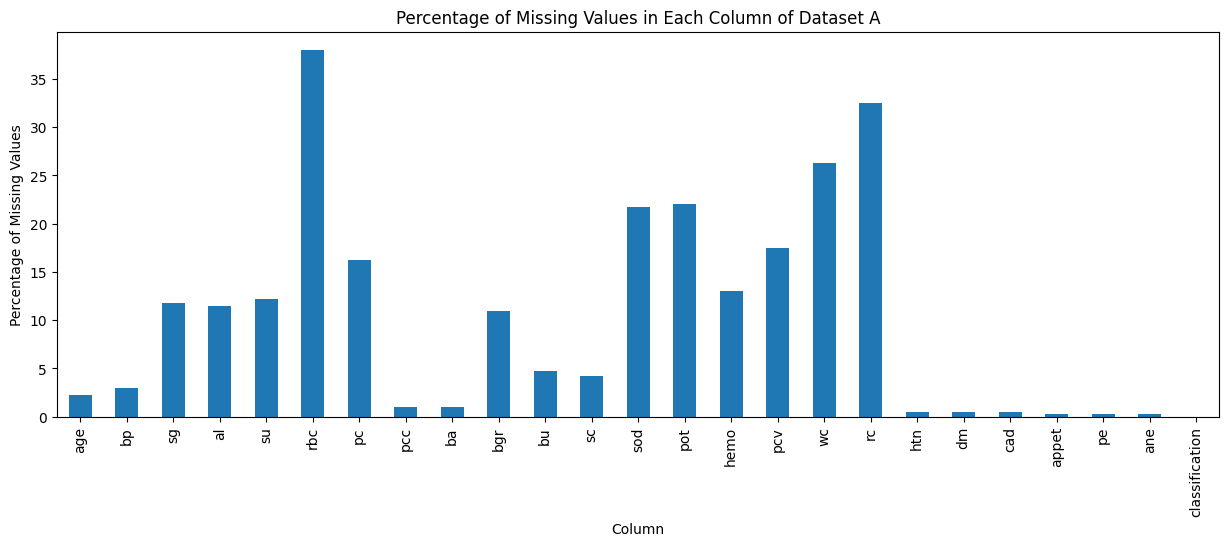

In [ ]:

import matplotlib.pyplot as plt

missing_value_percentage.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Column')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column of Dataset A')
plt.savefig('Percentage of Missing Values in Each Column of Dataset A.pdf',bbox_inches='tight')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

<ipython-input-11-30c783cb9602>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [ ]:
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [ ]:
df['classification'].unique()

array([0, 1])

In [ ]:

categorical_columns = []
for col in df.columns:
    if len(df[col].unique()) < 8:
        categorical_columns.append(col)

print(f"Categorical columns with numerical transformation: {categorical_columns}")
len(categorical_columns)

Categorical columns with numerical transformation: ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


14

In [ ]:
# Feature scaling
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Apply label encoding to all categorical columns except 'sg'
for col in categorical_columns:
    if col != 'sg':
        df[col] = label_encoder.fit_transform(df[col])

# Print the transformed DataFrame
df


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38,6000,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31,7500,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47,6700,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54,7800,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49,6600,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51,7200,5.9,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              400 non-null    int64  
 4   su              400 non-null    int64  
 5   rbc             400 non-null    int64  
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
import numpy as np

# Replace non-numeric values with NaN
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Convert columns to float64
df['pcv'] = df['pcv'].astype('float64')
df['wc'] = df['wc'].astype('float64')
df['rc'] = df['rc'].astype('float64')


In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


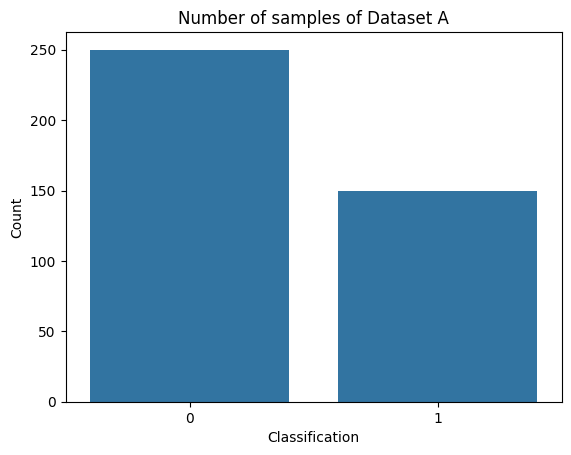

In [ ]:
# prompt: histogram of classification

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='classification', data=df)
plt.title('Number of samples of Dataset A')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

In [ ]:
# separate target variable
x=df.drop('classification', axis=1)
y=df['classification']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [ ]:
# feature normalized
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


**RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the metrics
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Accuracy: 0.9875
Precision: 0.9655172413793104
Recall: 1.0
F1 Score: 0.9824561403508771


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Adaboost model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

ValueError: Input X contains NaN.
AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**SVM**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**XGB Classifier**

In [ ]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

Accuracy: 0.9875
Precision: 0.9655172413793104
Recall: 1.0
F1 Score: 0.9824561403508771


**ANN Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6103 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6222 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5995 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6156 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6046 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6373 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6252 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6403 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**LSTM Model**

In [ ]:
# Required Libraries
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split

if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(150, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_lstm.predict(X_test)
y_pred_lstm = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6063 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6367 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5943 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5717 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6051 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6533 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6242 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6375 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**RNN model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input, Dropout

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# feature normalized
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Reshape the data for RNN input
#X_train_rnn = X_train.to_numpy().reshape((X_train.shape[0], X_train.shape[1], 1))
#X_test_rnn = X_test.to_numpy().reshape((X_test.shape[0], X_test.shape[1], 1))

# Reshape the data for RNN input: (samples, timesteps, features)
X_train_rnn = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = Sequential()
model.add(Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test))

# Get predictions
predictions_probs = model.predict(X_test_rnn)
predictions = (predictions_probs > 0.5).astype("int32")

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6999 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6150 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6201 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6476 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6096 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5953 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5896 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6025 - loss: nan - val_accuracy: 0.6500 - val_loss: nan
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


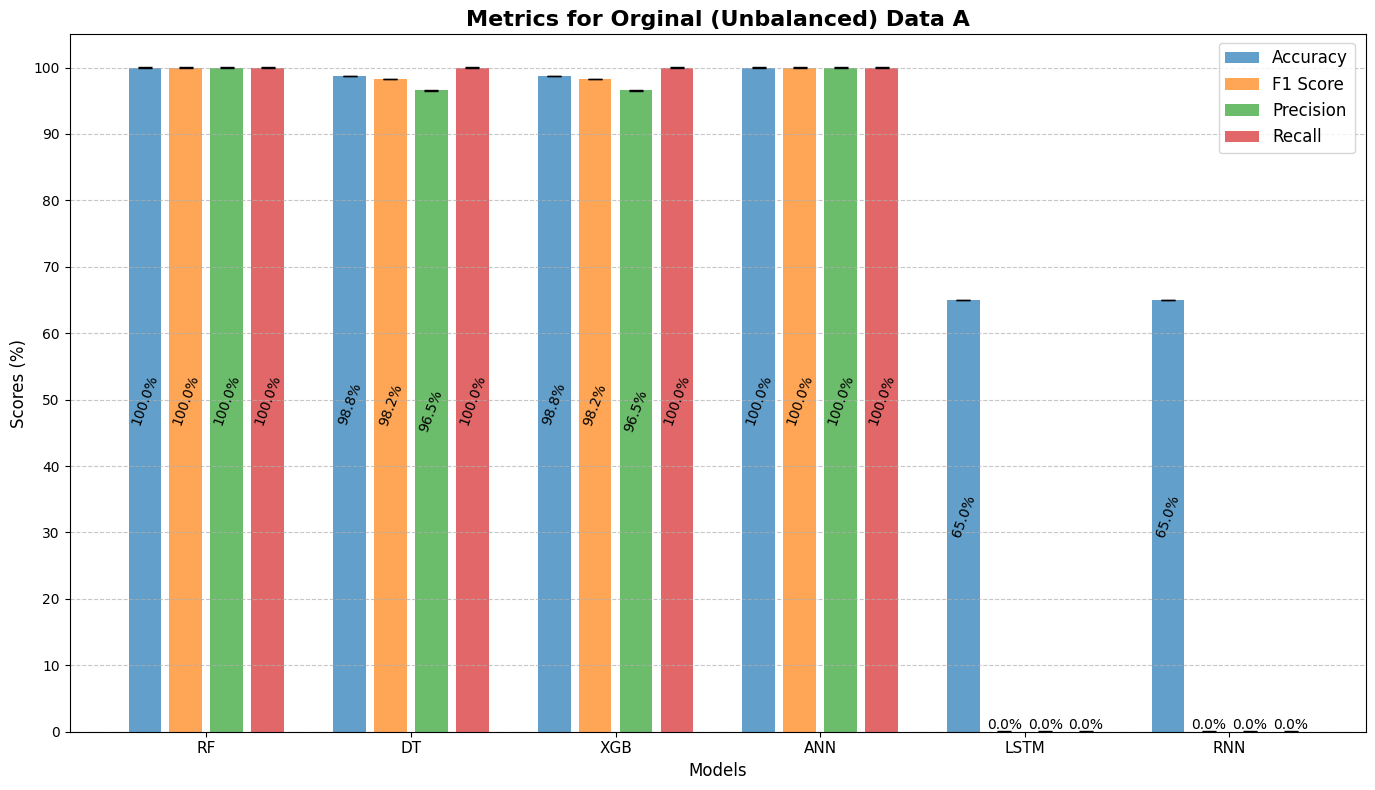

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'XGB', 'ANN', 'LSTM', 'RNN']
accuracy = [100 * x for x in [1.0, 0.9875, 0.9875, 1.0, 0.65, 0.65]]
precision = [100 * x for x in [1.0, 0.9655, 0.9655, 1.0, 0.0, 0.0]]
recall = [100 * x for x in [1.0, 1.0, 1.0, 1.0, 0.0, 0.0]]
f1_score = [100 * x for x in [1.0, 0.9825, 0.9825, 1.0, 0.0, 0.0]]

# Dummy error values
error_accuracies = [0.02, 0.03, 0.02, 0.02, 0.05, 0.05]
error_precisions = [0.01, 0.02, 0.02, 0.01, 0.05, 0.05]
error_recalls = [0.01, 0.01, 0.01, 0.01, 0.05, 0.05]
error_f1_scores = [0.02, 0.03, 0.02, 0.02, 0.05, 0.05]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(14, 8))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=10,
                color='black',
                rotation=0,  # No rotation for 0.0%
                rotation_mode='anchor'
            )
        else:

            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=10,
                color='black',
                rotation=70,  # Rotate the non-zero text
                rotation_mode='anchor'
            )

# Styling and layout
ax.set_title('Metrics for Orginal (Unbalanced) Data A', fontsize=16, weight='bold')
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores (%)', fontsize=12)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylim(0, 105)
ax.set_yticks(np.arange(0, 101, 10))
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.88, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for Orginal (Unbalanced) Data A.pdf',bbox_inches='tight')
plt.show()


**Experiments with imputation techniques and without data balance**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

file_path =("/content/drive/MyDrive/kidney.csv")
df = pd.read_csv(file_path)
np.random.seed(42)
random_state = 42
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df = df.drop('id', axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

<ipython-input-32-30c783cb9602>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [ ]:
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [ ]:
df['classification'].unique()

array([0, 1])

In [ ]:
categorical_columns = []
for col in df.columns:
    if len(df[col].unique()) < 8:
        categorical_columns.append(col)

print(f"Categorical columns with numerical transformation: {categorical_columns}")
len(categorical_columns)

Categorical columns with numerical transformation: ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


14

In [ ]:
# Feature scaling
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Apply label encoding to all categorical columns except 'sg'
for col in categorical_columns:
    if col != 'sg':
        df[col] = label_encoder.fit_transform(df[col])

# Print the transformed DataFrame
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38,6000,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31,7500,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47,6700,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54,7800,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49,6600,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51,7200,5.9,0,0,0,0,0,0,1


In [ ]:
import numpy as np

# Replace non-numeric values with NaN
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Convert columns to float64
df['pcv'] = df['pcv'].astype('float64')
df['wc'] = df['wc'].astype('float64')
df['rc'] = df['rc'].astype('float64')

df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [ ]:
df.isnull().sum()

,0
age,9
bp,12
sg,47
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,44


In [ ]:
# Handle missing data using imputation
from sklearn.impute import SimpleImputer

def handle_missing_data(df):
    df.replace('discrete', np.nan, inplace=True)
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns

    # Impute numerical columns
    if len(num_cols) > 0:
        num_imputer = SimpleImputer(strategy='mean')
        df[num_cols] = num_imputer.fit_transform(df[num_cols])

    # Impute categorical columns
    if len(cat_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    return df

# Clean datasets
df = handle_missing_data(df.copy())

In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2.0,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,2.0,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.000000,...,47.0,6700.0,4.900000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.000000,...,54.0,7800.0,6.200000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.000000,...,49.0,6600.0,5.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.000000,...,51.0,7200.0,5.900000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


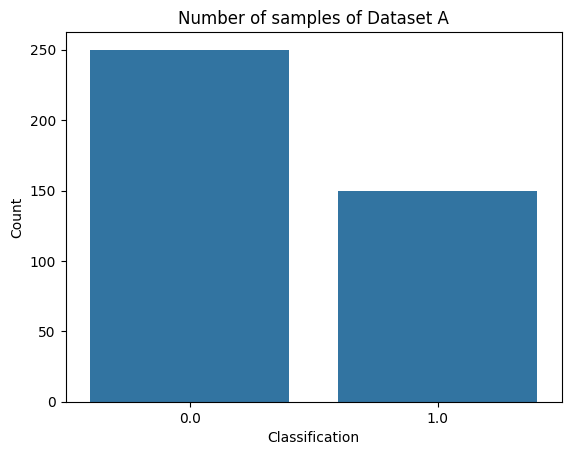

In [ ]:
# prompt: histogram of classification

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='classification', data=df)
plt.title('Number of samples of Dataset A')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

In [ ]:
# separate target variable
x=df.drop('classification', axis=1)
y=df['classification']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [ ]:
# feature normalized
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

**RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the metrics
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Accuracy: 0.975
Precision: 0.9642857142857143
Recall: 0.9642857142857143
F1 Score: 0.9642857142857143


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the metrics
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

Accuracy: 0.9625
Precision: 0.9629629629629629
Recall: 0.9285714285714286
F1 Score: 0.9454545454545454


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print the metrics
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Accuracy: 0.9625
Precision: 0.9629629629629629
Recall: 0.9285714285714286
F1 Score: 0.9454545454545454


**AdaBoost Model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

# Print the metrics
print(f"Accuracy: {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"F1 Score: {f1_ada}")

Accuracy: 0.975
Precision: 0.9642857142857143
Recall: 0.9642857142857143
F1 Score: 0.9642857142857143


**NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb= f1_score(y_test, y_pred_nb)

# Print the metrics
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

Accuracy: 0.8625
Precision: 0.7575757575757576
Recall: 0.8928571428571429
F1 Score: 0.819672131147541


**SVM**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_svm= accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm= f1_score(y_test, y_pred_svm)

# Print the metrics
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

Accuracy: 0.9625
Precision: 0.9629629629629629
Recall: 0.9285714285714286
F1 Score: 0.9454545454545454


**XGB**

In [ ]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test, y_pred_xgb)

# Print the metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

Accuracy: 0.9875
Precision: 0.9655172413793104
Recall: 1.0
F1 Score: 0.9824561403508771


**ANN Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6793 - loss: 0.6294 - val_accuracy: 0.9125 - val_loss: 0.4743
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8925 - loss: 0.4728 - val_accuracy: 0.9375 - val_loss: 0.3717
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9551 - loss: 0.3539 - val_accuracy: 0.9500 - val_loss: 0.3022
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9452 - loss: 0.3001 - val_accuracy: 0.9500 - val_loss: 0.2541
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9698 - loss: 0.2455 - val_accuracy: 0.9625 - val_loss: 0.2228
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9684 - loss: 0.1697 - val_accuracy: 0.9625 - val_loss: 0.2026
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9664 - loss: 0.1429 - val_accuracy: 0.9375 - val_loss: 0.1897
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9817 - loss: 0.1339 - val_accuracy: 0.9500 - val_loss: 0.1796


**LSTM Model**

In [ ]:
# Required Libraries
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split

if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(150, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_lstm.predict(X_test)
y_pred_lstm = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.6799 - loss: 0.6891 - val_accuracy: 0.9625 - val_loss: 0.6609
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9789 - loss: 0.6504 - val_accuracy: 0.9375 - val_loss: 0.5878
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9496 - loss: 0.5625 - val_accuracy: 0.9250 - val_loss: 0.4394
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9436 - loss: 0.4091 - val_accuracy: 0.9375 - val_loss: 0.2667
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9063 - loss: 0.2505 - val_accuracy: 0.9375 - val_loss: 0.1830
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9320 - loss: 0.1822 - val_accuracy: 0.9250 - val_loss: 0.1545
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9637 - loss: 0.1176 - val_accuracy: 0.9500 - val_loss: 0.1422
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9789 - loss: 0.0835 - val_accuracy: 0.9500 - 

**RNN Model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input, Dropout

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# feature normalized
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Reshape the data for RNN input
#X_train_rnn = X_train.to_numpy().reshape((X_train.shape[0], X_train.shape[1], 1))
#X_test_rnn = X_test.to_numpy().reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_rnn = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = Sequential()
model.add(Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test))

# Get predictions
predictions_probs = model.predict(X_test_rnn)
predictions = (predictions_probs > 0.5).astype("int32")

# Calculate precision, recall, and F1 score
accuracy_rnn = accuracy_score(y_test, predictions)
precision_rnn = precision_score(y_test, predictions)
recall_rnn = recall_score(y_test, predictions)
f1_rnn = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy_rnn}")
print(f"Precision: {precision_rnn}")
print(f"Recall: {recall_rnn}")
print(f"F1 Score: {f1_rnn}")

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6687 - loss: 0.6375 - val_accuracy: 0.8875 - val_loss: 0.5904
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8083 - loss: 0.5717 - val_accuracy: 0.8750 - val_loss: 0.5359
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8305 - loss: 0.5073 - val_accuracy: 0.8625 - val_loss: 0.4803
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8267 - loss: 0.4396 - val_accuracy: 0.9125 - val_loss: 0.4205
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8839 - loss: 0.3753 - val_accuracy: 0.9500 - val_loss: 0.3028
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9096 - loss: 0.2963 - val_accuracy: 0.9750 - val_loss: 0.2083
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9383 - loss: 0.1973 - val_accuracy: 0.9500 - val_loss: 0.2201
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9440 - loss: 0.1823 - val_accuracy: 0.9750 - v

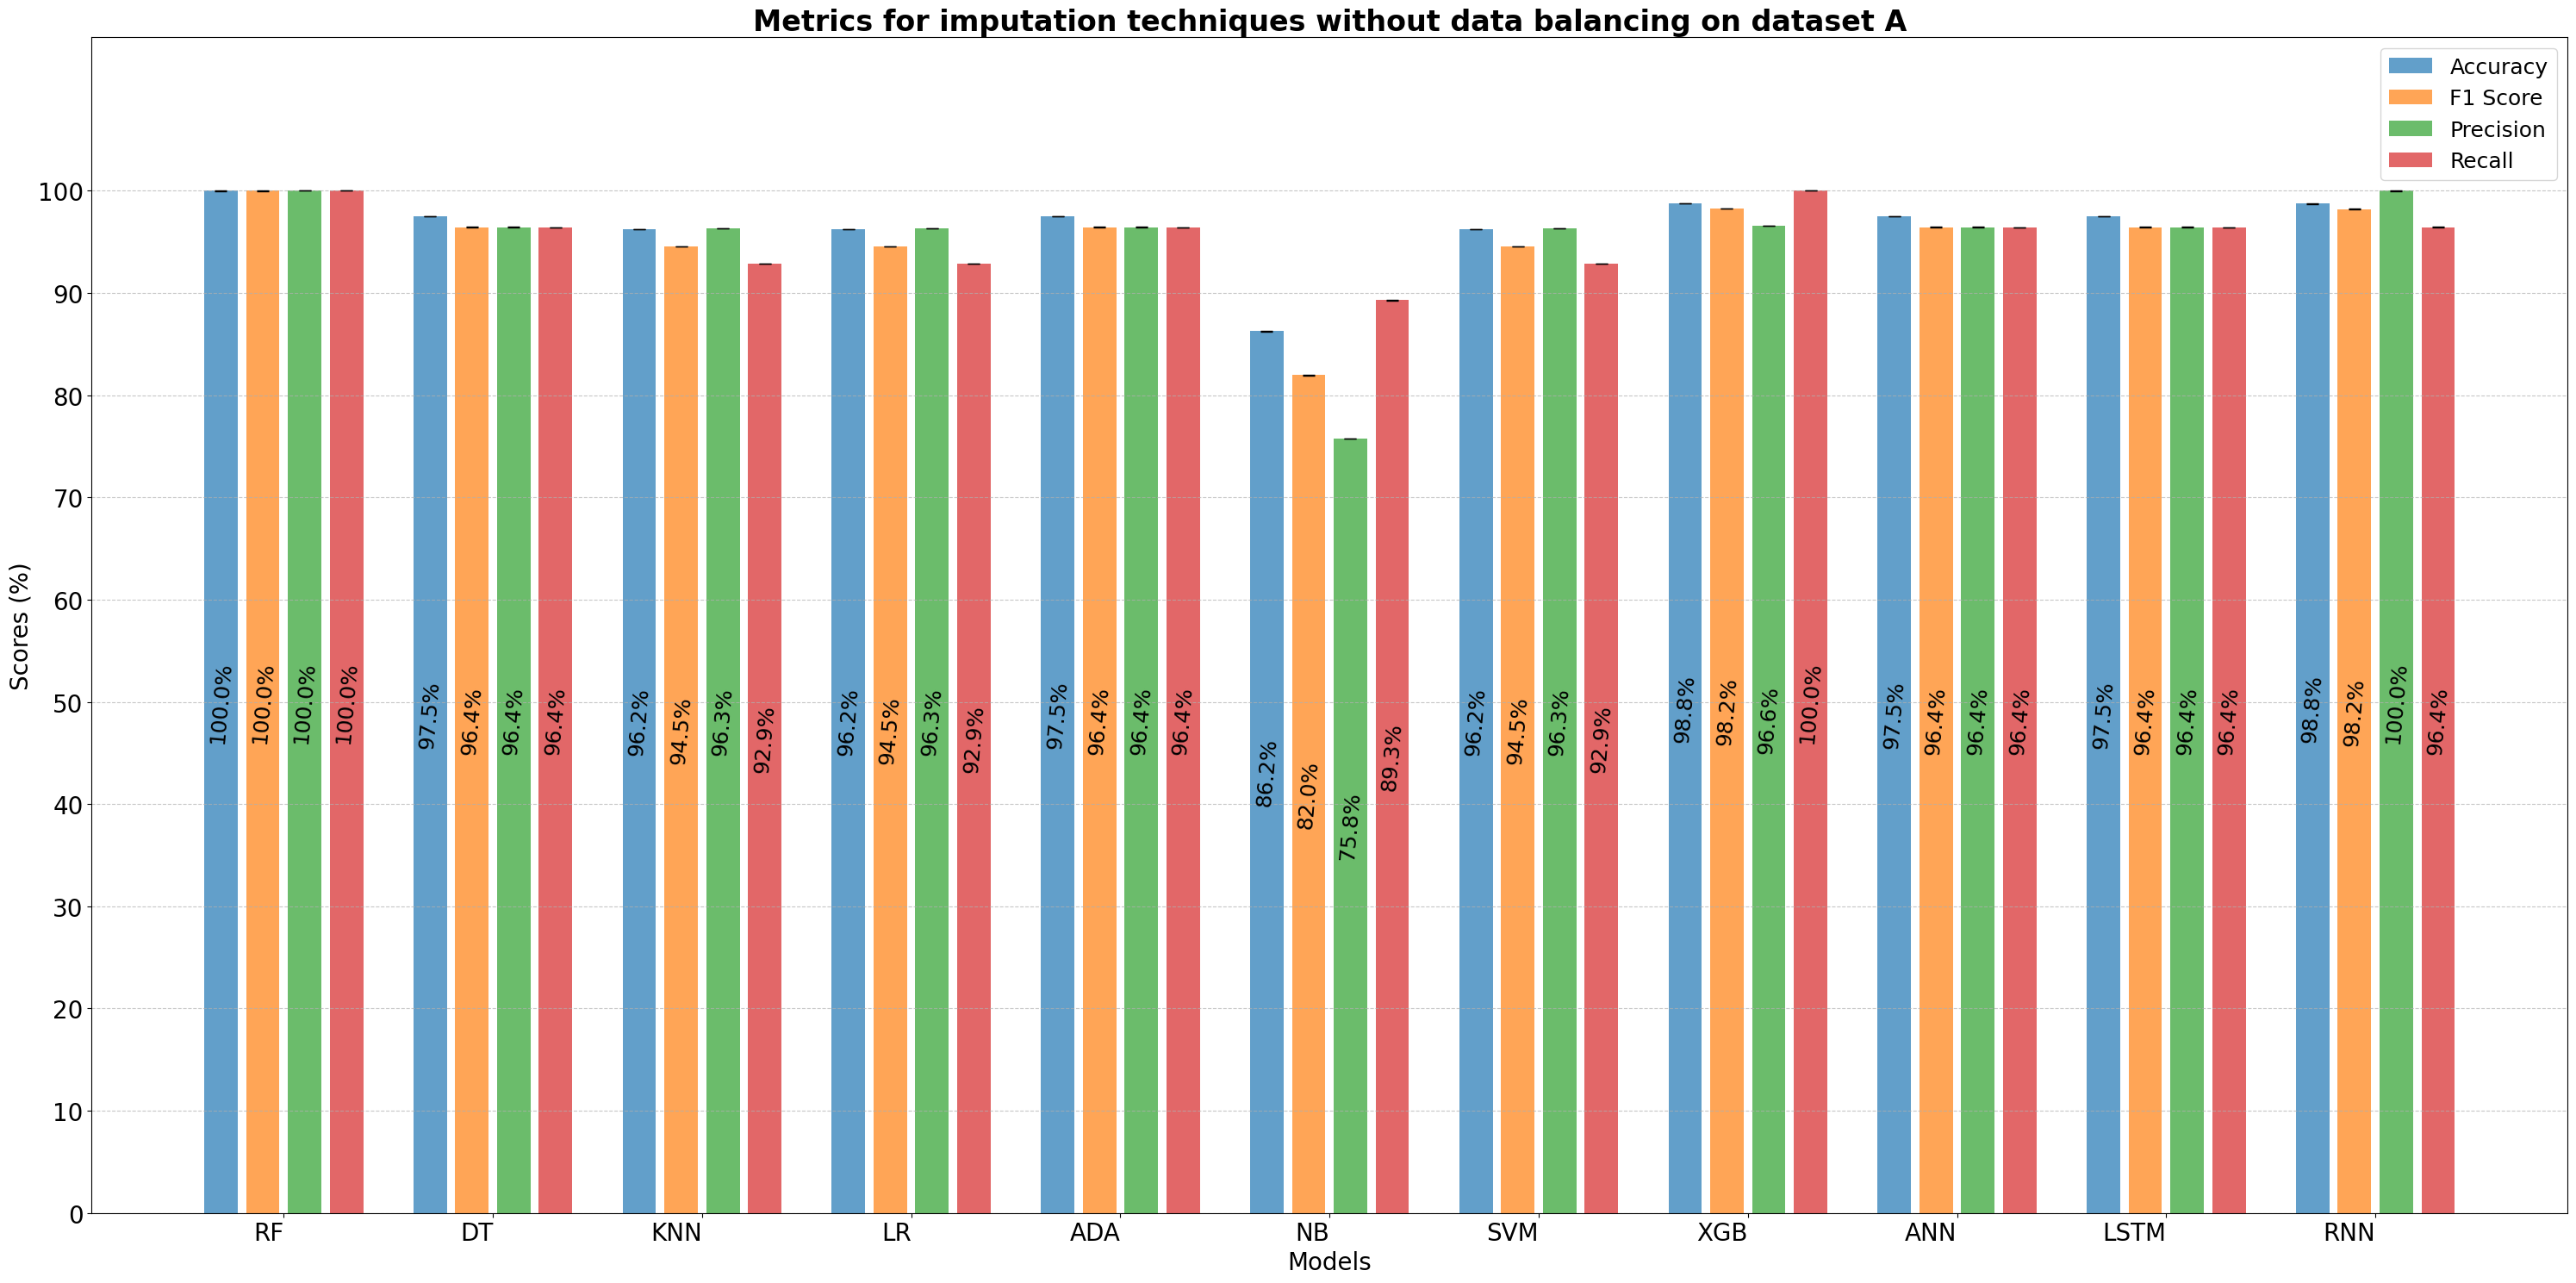

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

# Accuracy, Precision, Recall, F1 Score for each model
accuracy = [100 * x for x in [1.0, 0.975, 0.9625, 0.9625, 0.975, 0.8625, 0.9625, 0.9875, 0.975, 0.975, 0.9875]]
precision = [100 * x for x in [1.0, 0.9642857142857143, 0.9629629629629629, 0.9629629629629629, 0.9642857142857143, 0.7575757575757576, 0.9629629629629629, 0.9655172413793104, 0.9642857142857143, 0.9642857142857143, 1.0]]
recall = [100 * x for x in [1.0, 0.9642857142857143, 0.9285714285714286, 0.9285714285714286, 0.9642857142857143, 0.8928571428571429, 0.9285714285714286, 1.0, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143]]
f1_score = [100 * x for x in [1.0, 0.9642857142857143, 0.9454545454545454, 0.9454545454545454, 0.9642857142857143, 0.819672131147541, 0.9454545454545454, 0.9824561403508771, 0.9642857142857143, 0.9642857142857143, 0.9818181818181818]]

# Dummy error values for error bars
error_accuracies = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]
error_precisions = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02, 0.02, 0.05]
error_recalls = [0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.05]
error_f1_scores = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )

        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for imputation techniques without data balancing on dataset A', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=20)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=20)
ax.legend(fontsize=18, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for imputation techniques without data balancing on dataset A.pdf', bbox_inches='tight')
plt.show()


**Experiment with imputation techniques and smote balancing and all features**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

file_path =("/content/drive/MyDrive/kidney.csv")
df = pd.read_csv(file_path)
np.random.seed(42)
random_state = 42
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
df = df.drop('id', axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

<ipython-input-13-30c783cb9602>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [ ]:
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [ ]:
df['classification'].unique()

array([0, 1])

In [ ]:
categorical_columns = []
for col in df.columns:
    if len(df[col].unique()) < 8:
        categorical_columns.append(col)

print(f"Categorical columns with numerical transformation: {categorical_columns}")
len(categorical_columns)

Categorical columns with numerical transformation: ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


14

In [ ]:
# Feature scaling
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Apply label encoding to all categorical columns except 'sg'
for col in categorical_columns:
    if col != 'sg':
        df[col] = label_encoder.fit_transform(df[col])

# Print the transformed DataFrame
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38,6000,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31,7500,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47,6700,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54,7800,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49,6600,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51,7200,5.9,0,0,0,0,0,0,1


In [ ]:
import numpy as np

# Replace non-numeric values with NaN
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Convert columns to float64
df['pcv'] = df['pcv'].astype('float64')
df['wc'] = df['wc'].astype('float64')
df['rc'] = df['rc'].astype('float64')

df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [ ]:
# Handle missing data using imputation
from sklearn.impute import SimpleImputer

def handle_missing_data(df):
    df.replace('discrete', np.nan, inplace=True)
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns

    # Impute numerical columns
    if len(num_cols) > 0:
        num_imputer = SimpleImputer(strategy='mean')
        df[num_cols] = num_imputer.fit_transform(df[num_cols])

    # Impute categorical columns
    if len(cat_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    return df

# Clean datasets
df = handle_missing_data(df.copy())

In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2.0,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,2.0,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.000000,...,47.0,6700.0,4.900000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.000000,...,54.0,7800.0,6.200000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.000000,...,49.0,6600.0,5.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.000000,...,51.0,7200.0,5.900000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


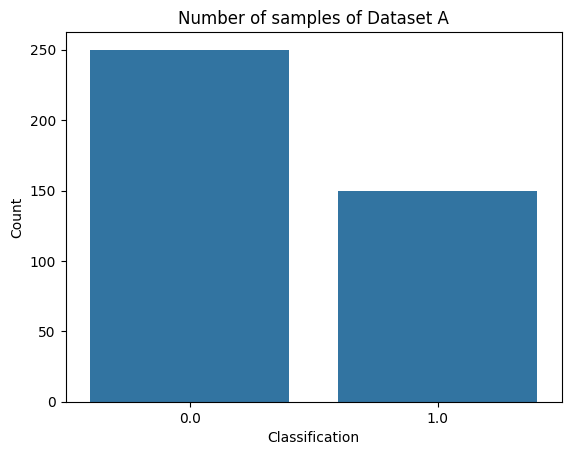

In [ ]:
# prompt: histogram of classification

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='classification', data=df)
plt.title('Number of samples of Dataset A')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

In [ ]:
# separate target variable
x=df.drop('classification', axis=1)
y=df['classification']

In [ ]:
#handle imbalanced data
sm = SMOTE(k_neighbors=5)
X_res, y_res = sm.fit_resample(x, y)
bal_array = np.hstack((X_res, np.atleast_2d(y_res).T)) #resample data
bal_data = pd.DataFrame(bal_array,columns=df.columns.values) # combined data

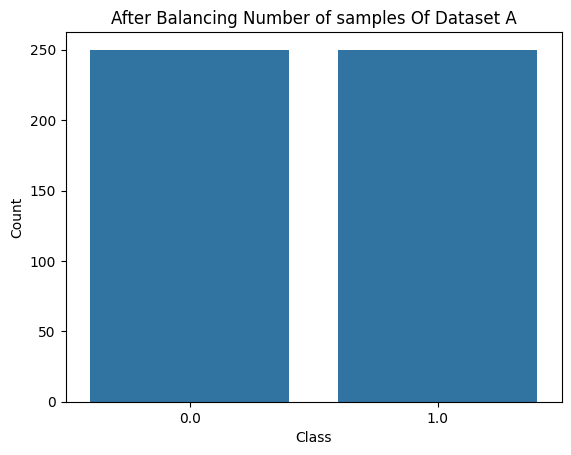

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(x='classification', data=bal_data)
plt.title('After Balancing Number of samples Of Dataset A')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
bal_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2.0,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,2.0,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bal_data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,50.368926,75.613878,1.018439,1.308753,0.940753,1.216511,0.984511,0.110549,0.070549,140.770954,...,40.186111,8291.926343,4.824395,0.304970,0.284970,0.078970,0.170843,0.158843,0.126843,0.500000
std,16.312253,12.599781,0.005312,1.947892,1.949902,0.595907,0.534419,0.345918,0.294683,68.812576,...,7.889164,2396.465731,0.812947,0.469483,0.460648,0.284439,0.383598,0.372944,0.340857,0.500501
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.579586,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,100.000000,...,36.000000,6867.844241,4.673838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.793605,76.469072,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,122.000000,...,41.000000,8406.122449,4.707435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,62.000000,80.000000,1.023197,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,148.036517,...,45.364770,9225.000000,5.300000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,490.000000,...,54.000000,26400.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
# separate target variable from balanced data
features =bal_data.iloc[:, :-1]
class_variable = bal_data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, class_variable, test_size=0.2, random_state=42)

In [ ]:
# feature normalized
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


**RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy1}")
print(f"Precision: {precision1}")
print(f"Recall: {recall1}")
print(f"F1 Score: {f1_score1}")

Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


**DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_dt1 = accuracy_score(y_test, y_pred_dt)
precision_dt1 = precision_score(y_test, y_pred_dt)
recall_dt1 = recall_score(y_test, y_pred_dt)
f1_dt1 = f1_score(y_test, y_pred_dt)

# Print the metrics
print(f"Accuracy: {accuracy_dt1}")
print(f"Precision: {precision_dt1}")
print(f"Recall: {recall_dt1}")
print(f"F1 Score: {f1_dt1}")

Accuracy: 0.97
Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1 Score: 0.9724770642201835


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_knn1 = accuracy_score(y_test, y_pred_knn)
precision_knn1 = precision_score(y_test, y_pred_knn)
recall_knn1 = recall_score(y_test, y_pred_knn)
f1_knn1 = f1_score(y_test, y_pred_knn)

# Print the metrics
print(f"Accuracy: {accuracy_knn1}")
print(f"Precision: {precision_knn1}")
print(f"Recall: {recall_knn1}")
print(f"F1 Score: {f1_knn1}")

Accuracy: 0.97
Precision: 0.9473684210526315
Recall: 1.0
F1 Score: 0.972972972972973


**LR**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy_lr1 = accuracy_score(y_test, y_pred_lr)
precision_lr1 = precision_score(y_test, y_pred_lr)
recall_lr1 = recall_score(y_test, y_pred_lr)
f1_lr1 = f1_score(y_test, y_pred_lr)

# Print the metrics
print(f"Accuracy: {accuracy_lr1}")
print(f"Precision: {precision_lr1}")
print(f"Recall: {recall_lr1}")
print(f"F1 Score: {f1_lr1}")

Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


**Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_ada1 = accuracy_score(y_test, y_pred_ada)
precision_ada1 = precision_score(y_test, y_pred_ada)
recall_ada1 = recall_score(y_test, y_pred_ada)
f1_ada1 = f1_score(y_test, y_pred_ada)

# Print the metrics
print(f"Accuracy: {accuracy_ada1}")
print(f"Precision: {precision_ada1}")
print(f"Recall: {recall_ada1}")
print(f"F1 Score: {f1_ada1}")

Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


**NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_nb1 = accuracy_score(y_test, y_pred_nb)
precision_nb1 = precision_score(y_test, y_pred_nb)
recall_nb1 = recall_score(y_test, y_pred_nb)
f1_nb1= f1_score(y_test, y_pred_nb)

# Print the metrics
print(f"Accuracy: {accuracy_nb1}")
print(f"Precision: {precision_nb1}")
print(f"Recall: {recall_nb1}")
print(f"F1 Score: {f1_nb1}")

Accuracy: 0.94
Precision: 0.9615384615384616
Recall: 0.9259259259259259
F1 Score: 0.9433962264150944


**SVM**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_svm1 = accuracy_score(y_test, y_pred_svm)
precision_svm1 = precision_score(y_test, y_pred_svm)
recall_svm1 = recall_score(y_test, y_pred_svm)
f1_svm1 = f1_score(y_test, y_pred_svm)

# Print the metrics
print(f"Accuracy: {accuracy_svm1}")
print(f"Precision: {precision_svm1}")
print(f"Recall: {recall_svm1}")
print(f"F1 Score: {f1_svm1}")

Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


**XGB**

In [ ]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_xgb1 = accuracy_score(y_test, y_pred_xgb)
precision_xgb1 = precision_score(y_test, y_pred_xgb)
recall_xgb1 = recall_score(y_test, y_pred_xgb)
f1_xgb1 = f1_score(y_test, y_pred_xgb)

# Print the metrics
print(f"Accuracy: {accuracy_xgb1}")
print(f"Precision: {precision_xgb1}")
print(f"Recall: {recall_xgb1}")
print(f"F1 Score: {f1_xgb1}")

Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


**ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy_ann}")
print(f"precision: {precision_ann}")
print(f"recall: {recall_ann}")
print(f"F1 score: {f1_ann}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7844 - loss: 0.5561 - val_accuracy: 0.9400 - val_loss: 0.4055
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9469 - loss: 0.3543 - val_accuracy: 0.9400 - val_loss: 0.2794
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9524 - loss: 0.2488 - val_accuracy: 0.9600 - val_loss: 0.2023
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9452 - loss: 0.1976 - val_accuracy: 0.9600 - val_loss: 0.1545
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9655 - loss: 0.1439 - val_accuracy: 0.9700 - val_loss: 0.1200
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9692 - loss: 0.1170 - val_accuracy: 0.9900 - val_loss: 0.0961
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9799 - loss: 0.0850 - val_accuracy: 0.9900 - val_loss: 0.0795
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9763 - loss: 0.0845 - val_accuracy: 0.9900 - val_loss: 0.0685
Ep

**LSTM**

In [ ]:
# Required Libraries
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split

if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(150, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_lstm.predict(X_test)
y_pred_lstm = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)

# Output results
print(f"accuracy: {accuracy_lstm}")
print(f"precision: {precision_lstm}")
print(f"recall: {recall_lstm}")
print(f"F1 score: {f1_lstm}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8456 - loss: 0.6837 - val_accuracy: 0.9300 - val_loss: 0.6463
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9671 - loss: 0.6146 - val_accuracy: 0.9100 - val_loss: 0.5166
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9539 - loss: 0.4470 - val_accuracy: 0.9200 - val_loss: 0.2980
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9564 - loss: 0.2317 - val_accuracy: 0.9200 - val_loss: 0.1619
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9566 - loss: 0.1313 - val_accuracy: 0.9300 - val_loss: 0.1282
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9760 - loss: 0.0888 - val_accuracy: 0.9600 - val_loss: 0.0960
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9764 - loss: 0.0593 - val_accuracy: 0.9700 - val_loss: 0.0790
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9881 - loss: 0.0393 - val_accuracy: 0.9800 - val_loss: 0.

**RNN**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input, Dropout

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, class_variable, test_size=0.2, random_state=42)

# feature normalized
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Reshape the data for RNN input
#X_train_rnn = X_train.to_numpy().reshape((X_train.shape[0], X_train.shape[1], 1))
#X_test_rnn = X_test.to_numpy().reshape((X_test.shape[0], X_test.shape[1], 1))

# Reshape the data for RNN input: (samples, timesteps, features)
X_train_rnn = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = Sequential()
model.add(Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test))

# Get predictions
predictions_probs = model.predict(X_test_rnn)
predictions = (predictions_probs > 0.5).astype("int32")

# Calculate precision, recall, and F1 score
accuracy_rnn1 = accuracy_score(y_test, predictions)
precision_rnn1 = precision_score(y_test, predictions)
recall_rnn1 = recall_score(y_test, predictions)
f1_rnn1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy_rnn1}")
print(f"Precision: {precision_rnn1}")
print(f"Recall: {recall_rnn1}")
print(f"F1 Score: {f1_rnn1}")

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7243 - loss: 0.6343 - val_accuracy: 0.8200 - val_loss: 0.5609
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7870 - loss: 0.5443 - val_accuracy: 0.8800 - val_loss: 0.4656
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8689 - loss: 0.4492 - val_accuracy: 0.8900 - val_loss: 0.2964
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9134 - loss: 0.3143 - val_accuracy: 0.9400 - val_loss: 0.1974
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9270 - loss: 0.2321 - val_accuracy: 0.9400 - val_loss: 0.1491
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9447 - loss: 0.2150 - val_accuracy: 0.9600 - val_loss: 0.1067
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9245 - loss: 0.2169 - val_accuracy: 0.9600 - val_loss: 0.1258
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9438 - loss: 0.1425 - val_accuracy: 0.9500 - v

**performance graph**

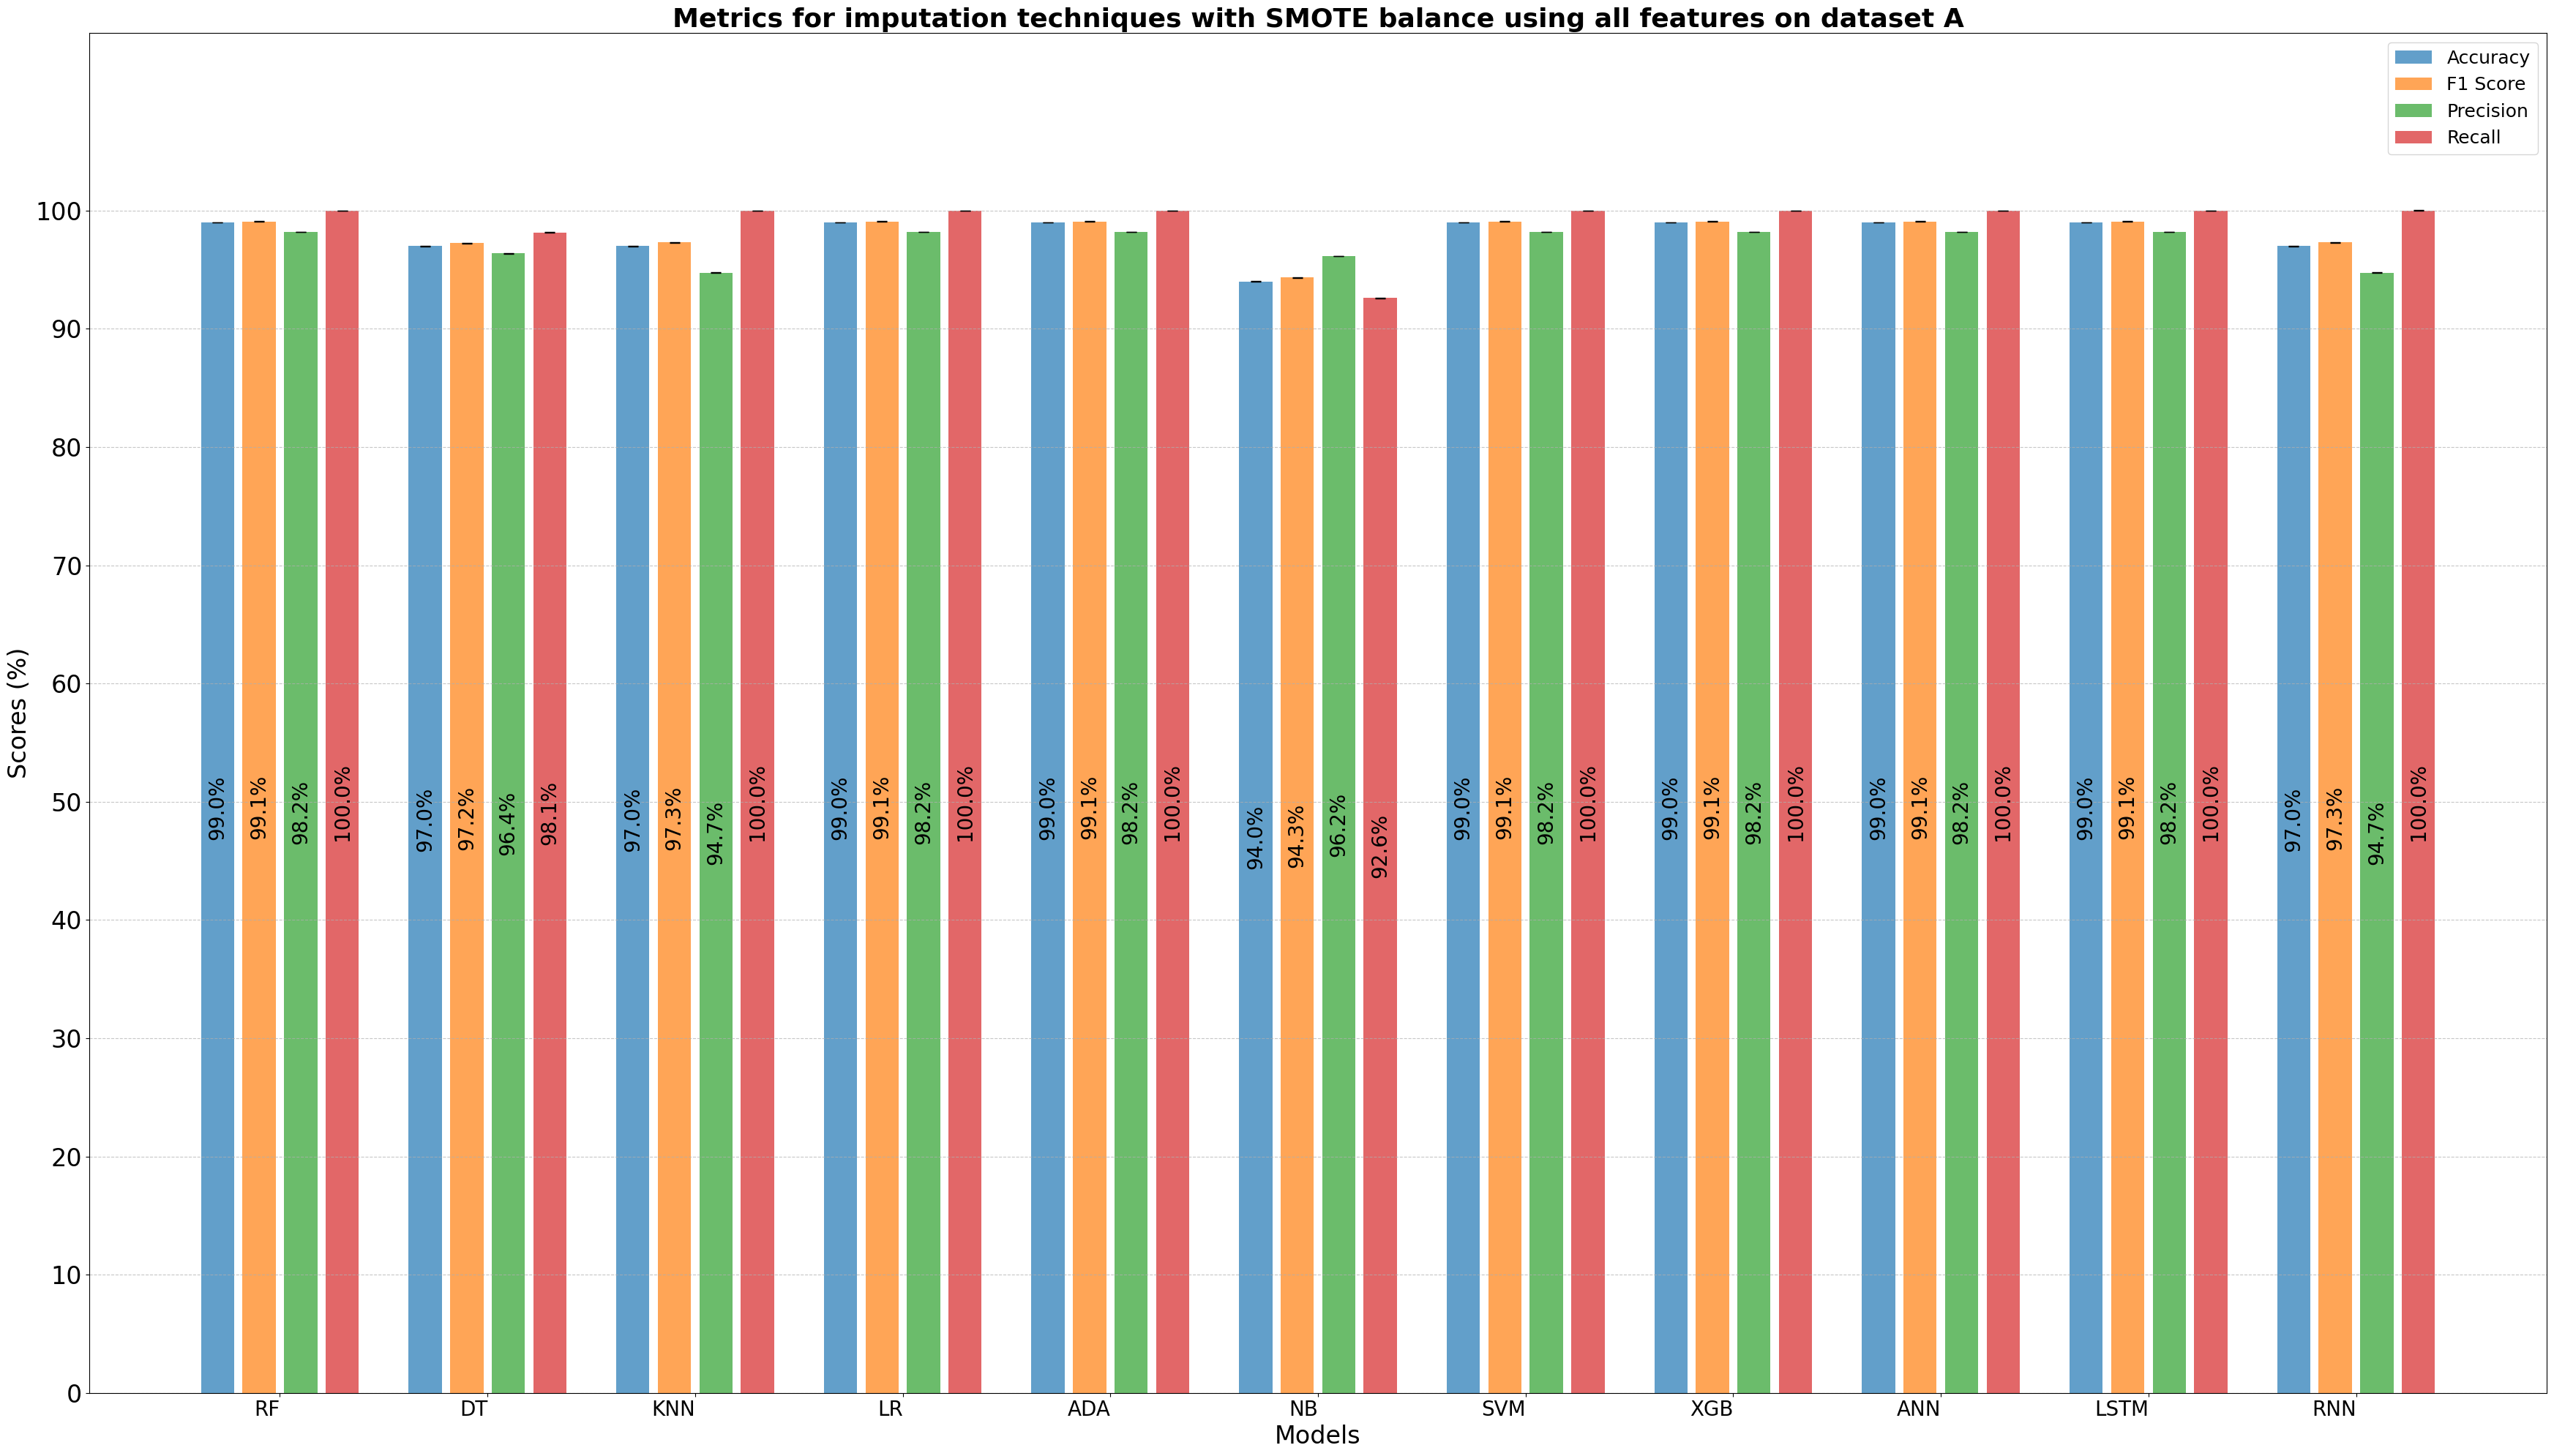

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

# Accuracy, Precision, Recall, F1 Score for each model
accuracy = [99.0, 97.0, 97.0, 99.0, 99.0, 94.0, 99.0, 99.0, 99.0, 99.0, 97.0]
precision = [98.18181818181819, 96.36363636363636, 94.73684210526316, 98.18181818181819, 98.18181818181819, 96.15384615384616, 98.18181818181819, 98.18181818181819, 98.18181818181819, 98.18181818181819, 94.73684210526316]
recall = [100.0, 98.14814814814815, 100.0, 100.0, 100.0, 92.5925925925926, 100.0, 100.0, 100.0, 100.0, 100.0]
f1_score = [99.08256880733946, 97.24770642201835, 97.29729729729729, 99.08256880733946, 99.08256880733946, 94.33962264150944, 99.08256880733946, 99.08256880733946, 99.08256880733946, 99.08256880733946, 97.29729729729729]

# Error values for the metrics
error_accuracies = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.03]
error_precisions = [0.01, 0.02, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.02]
error_recalls = [0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.02]
error_f1_scores = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.03]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(35, 20))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For 0.0% values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=20,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )

        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=20,
                color='black',
                rotation=90,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for imputation techniques with SMOTE balance using all features on dataset A', fontsize=26, weight='bold')
ax.set_xlabel('Models', fontsize=24)
ax.set_ylabel('Scores (%)', fontsize=24)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=20)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=18, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for imputation techniques with SMOTE balance using all features on dataset A.pdf', bbox_inches='tight')
plt.show()


**Experiment with imputation techniques and smote balancing and selected features**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

file_path =("/content/drive/MyDrive/kidney.csv")
df = pd.read_csv(file_path)
np.random.seed(42)
random_state = 42
df

Mounted at /content/drive


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
df = df.drop('id', axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

<ipython-input-91-30c783cb9602>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [ ]:
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [ ]:
df['classification'].unique()

array([0, 1])

In [ ]:
categorical_columns = []
for col in df.columns:
    if len(df[col].unique()) < 8:
        categorical_columns.append(col)

print(f"Categorical columns with numerical transformation: {categorical_columns}")
len(categorical_columns)

Categorical columns with numerical transformation: ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


14

In [ ]:
# Feature scaling
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Apply label encoding to all categorical columns except 'sg'
for col in categorical_columns:
    if col != 'sg':
        df[col] = label_encoder.fit_transform(df[col])

# Print the transformed DataFrame
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38,6000,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31,7500,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47,6700,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54,7800,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49,6600,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51,7200,5.9,0,0,0,0,0,0,1


In [ ]:
import numpy as np

# Replace non-numeric values with NaN
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Convert columns to float64
df['pcv'] = df['pcv'].astype('float64')
df['wc'] = df['wc'].astype('float64')
df['rc'] = df['rc'].astype('float64')

df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [ ]:
# Handle missing data using imputation
from sklearn.impute import SimpleImputer

def handle_missing_data(df):
    df.replace('discrete', np.nan, inplace=True)
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns

    # Impute numerical columns
    if len(num_cols) > 0:
        num_imputer = SimpleImputer(strategy='mean')
        df[num_cols] = num_imputer.fit_transform(df[num_cols])

    # Impute categorical columns
    if len(cat_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    return df

# Clean datasets
df = handle_missing_data(df.copy())

In [ ]:
df.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


In [ ]:
# separate target variable
X=df.drop('classification', axis=1)
y=df['classification']

In [ ]:
#handle imbalanced data
# Applying SMote
smote = SMOTE(k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a new DataFrame with resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['classification'] = y_resampled

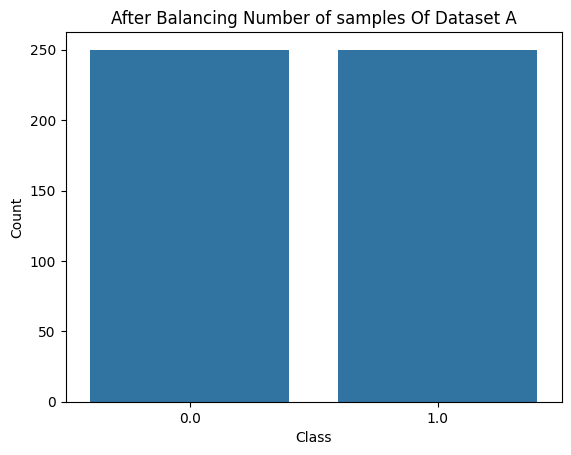

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='classification', data=bal_data)
plt.title('After Balancing Number of samples Of Dataset A')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

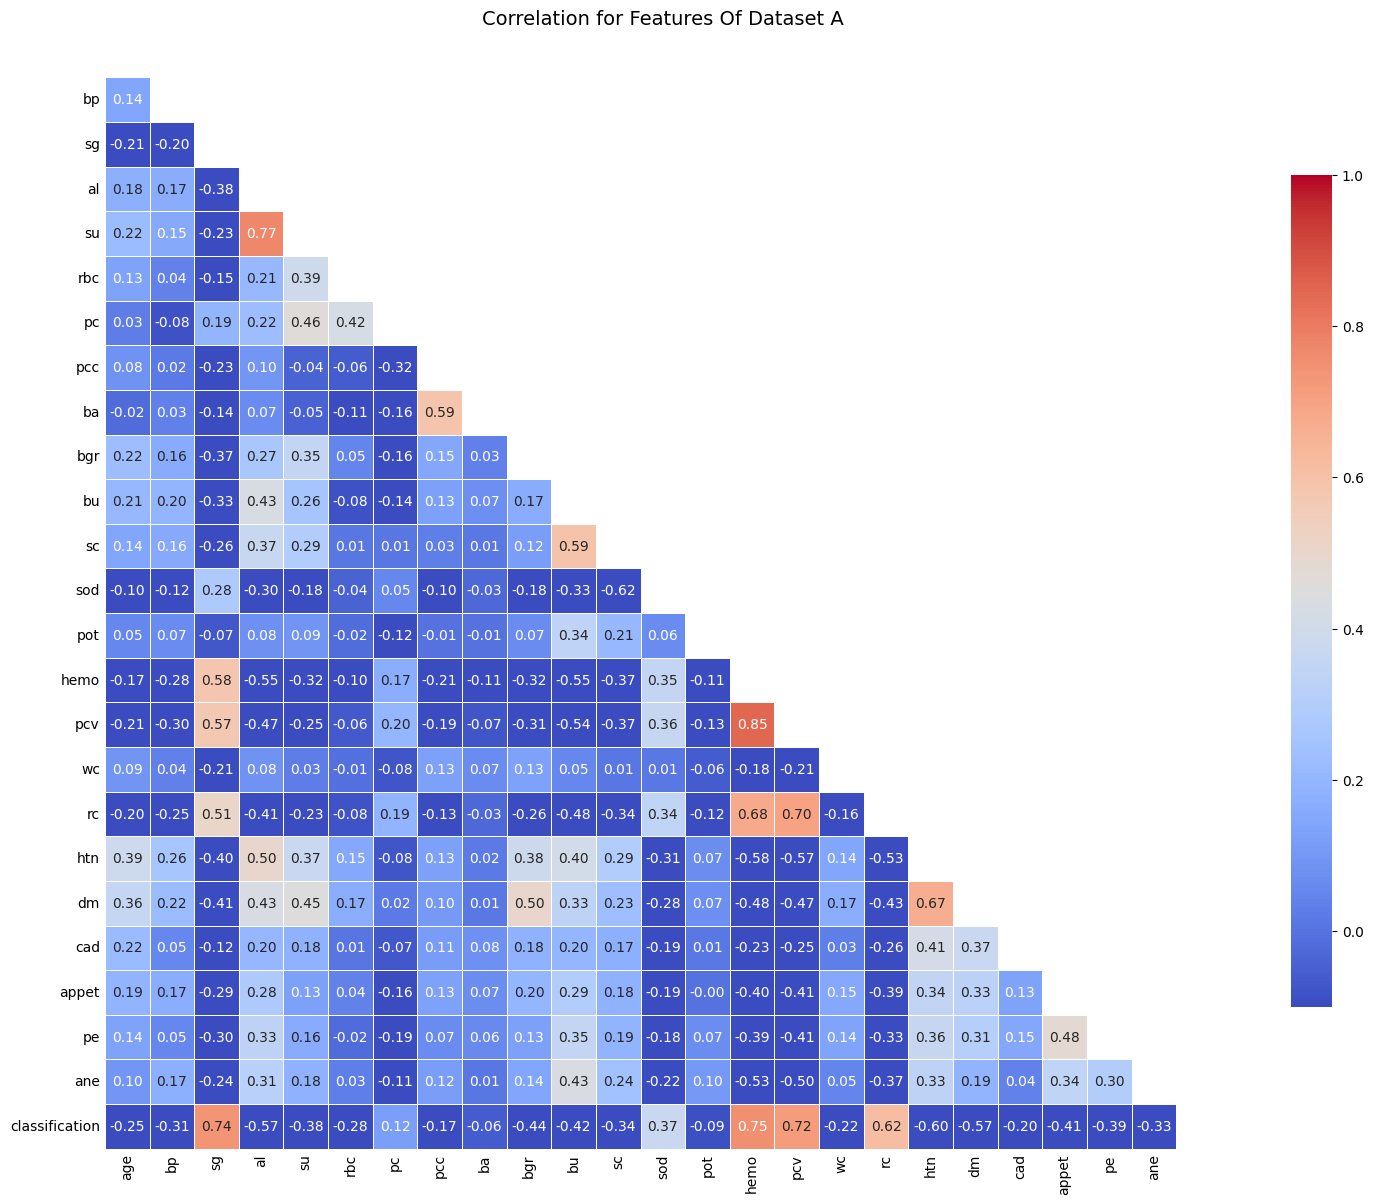

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute the correlation matrix
corr = bal_data.corr(numeric_only=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) # tril() for lower triangle

# Set up the matplotlib figure
plt.figure(figsize=(18, 18))

# Draw the heatmap with the mask
fig = sns.heatmap(corr, vmin=-0.1, vmax=1.0, mask=mask,
                  annot=True, fmt=".2f", cmap='coolwarm',
                  square=True, linewidths=0.5,
                  cbar_kws={"shrink":0.6}) #shrink the bar on the right

cust_labels = bal_data.columns.tolist() # convert pandas index to list [0:25]
cust_labels[0] = '' # empty the first label for the y-axis
fig.set_yticklabels(cust_labels)
fig.tick_params(axis='y', which='both', length=0) # supress ticks
cust_labels = bal_data.columns.tolist()
cust_labels[len(cust_labels)-1]= '' # empty the last label for the x-axis
fig.set_xticklabels(cust_labels)
fig.tick_params(axis='x', which='both', length=0)
plt.title("Correlation for Features Of Dataset A", fontsize=14)
plt.savefig("Correlation for Features Of Dataset A.pdf") # save figure
# Show the plot
plt.show()

In [ ]:
X_res = bal_data.drop('classification', axis=1)
y_res = bal_data['classification']

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Features and target
features = X_res
class_variable = y_res

# Lists to store the correlation coefficients and p-values
correlation_coefficients = []
p_values = []
highlighted_values = []

# Calculate Pearson's correlation for each feature with the class variable
for column in features.columns:
    correlation_coefficient, p_value = pearsonr(features[column], class_variable)
    correlation_coefficients.append(round(correlation_coefficient, 4))
    p_values.append(p_value)

    # Add symbols based on correlation strength
    if 0.7 < abs(correlation_coefficient) < 1:  # very high correlation
        highlighted_values.append(f"{correlation_coefficient:.4f} ***")
    elif 0.5 < abs(correlation_coefficient) < 0.7:  # high correlation
        highlighted_values.append(f"{correlation_coefficient:.4f} **")
    else:  # No highlighting for weaker correlations
        highlighted_values.append(f"{correlation_coefficient:.4f}")

# Creating a DataFrame to store results
correlation_results = pd.DataFrame({
    "Feature": features.columns,
    "CC": highlighted_values,
    "P-value": p_values,
})

# Sorting by absolute value of the original correlation coefficients
correlation_results = correlation_results.sort_values(
    by="CC", key=lambda x: x.str.extract(r'([-+]?\d*\.\d+|\d+)', expand=False).astype(float).abs(), ascending=False
)

# Print the results without row indices
print(correlation_results.to_string(index=False))

Feature         CC      P-value
   hemo 0.7546 *** 3.549854e-93
     sg 0.7414 *** 2.644154e-88
    pcv 0.7173 *** 3.633636e-80
     rc  0.6170 ** 8.732179e-54
    htn -0.6035 ** 6.367454e-51
     al -0.5731 ** 5.420808e-45
     dm -0.5716 ** 1.044462e-44
    bgr    -0.4435 1.661598e-25
     bu    -0.4193 1.029715e-22
  appet    -0.4101 1.053738e-21
     pe    -0.3896 1.426839e-19
     su    -0.3836 5.637420e-19
    sod     0.3687 1.512520e-17
     sc    -0.3354 1.312386e-14
    ane    -0.3323 2.347403e-14
     bp    -0.3086 1.700085e-12
    rbc    -0.2813 1.501721e-10
    age    -0.2500 1.451465e-08
     wc    -0.2151 1.209661e-06
    cad    -0.2007 6.105123e-06
    pcc    -0.1662 1.883620e-04
     pc     0.1208 6.829139e-03
    pot    -0.0884 4.827508e-02
     ba    -0.0593 1.857205e-01


In [ ]:
# Filter the DataFrame to keep only rows with ** or ***
df_selected = correlation_results[
    correlation_results["CC"].str.contains(r"\*\*")
]

# Print the filtered DataFrame with Feature, CC, and P-value
print(df_selected.to_string(index=False))


Feature         CC      P-value
   hemo 0.7546 *** 3.549854e-93
     sg 0.7414 *** 2.644154e-88
    pcv 0.7173 *** 3.633636e-80
     rc  0.6170 ** 8.732179e-54
    htn -0.6035 ** 6.367454e-51
     al -0.5731 ** 5.420808e-45
     dm -0.5716 ** 1.044462e-44


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Extract the selected features' data from the original dataset (X_res)
selected_features = df_selected['Feature'].values
X_selected = X_res[selected_features]

# Initialize the MinMaxScaler
scaler= StandardScaler()

# Fit the scaler on the selected features and transform them
X_scaled = scaler.fit_transform(X_selected)

# Create a new DataFrame with the scaled features
df_normalized = pd.DataFrame(X_scaled, columns=selected_features)

# Print the scaled features
print(df_normalized)

         hemo        sg       pcv        rc       htn        al        dm
0    0.898611  0.294212  0.483918  0.462492  1.481900 -0.158665  1.553783
1   -0.639535  0.294212 -0.277380 -0.144016 -0.650237  1.383004 -0.619247
2   -1.277303 -1.590212 -1.165562 -0.144016 -0.650237  0.355225  1.553783
3   -0.677051 -2.532424 -1.038679 -1.138231  1.481900  1.383004 -0.619247
4   -0.526988 -1.590212 -0.658030 -0.276303 -0.650237  0.355225 -0.619247
..        ...       ...       ...       ...       ...       ...       ...
495  0.418277  0.669989  0.890988  1.768565 -0.650237 -0.672554 -0.619247
496  0.437731  1.063463  0.173144  0.532672 -0.650237 -0.672554 -0.619247
497 -0.075515  0.294212 -0.034264  0.052780 -0.650237 -0.672554 -0.619247
498  0.958744  1.236423  0.198886  1.206295 -0.650237 -0.672554 -0.619247
499  0.685815  1.236423  0.479757 -0.278322 -0.650237 -0.672554 -0.619247

[500 rows x 7 columns]


In [ ]:
x = df_normalized
y = y_res

In [ ]:
# Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculate the metrics
accuracy_rf2 = accuracy_score(y_test, y_pred)
precision_rf2 = precision_score(y_test, y_pred)
recall_rf2 = recall_score(y_test, y_pred)
f1_rf2 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_rf2}")
print(f"Precision: {precision_rf2}")
print(f"Recall: {recall_rf2}")
print(f"F1 Score: {f1_rf2}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy_dt2 = accuracy_score(y_test, y_pred)
precision_dt2 = precision_score(y_test, y_pred)
recall_dt2 = recall_score(y_test, y_pred)
f1_dt2 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_dt2}")
print(f"Precision: {precision_dt2}")
print(f"Recall: {recall_dt2}")
print(f"F1 Score: {f1_dt2}")


Accuracy: 0.97
Precision: 1.0
Recall: 0.9444444444444444
F1 Score: 0.9714285714285714


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Calculate the metrics
accuracy_knn2 = accuracy_score(y_test, y_pred)
precision_knn2 = precision_score(y_test, y_pred)
recall_knn2 = recall_score(y_test, y_pred)
f1_knn2 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_knn2}")
print(f"Precision: {precision_knn2}")
print(f"Recall: {recall_knn2}")
print(f"F1 Score: {f1_knn2}")


Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


**LR**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Calculate the metrics
accuracy_lr2 = accuracy_score(y_test, y_pred)
precision_lr2 = precision_score(y_test, y_pred)
recall_lr2 = recall_score(y_test, y_pred)
f1_lr2 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_lr2}")
print(f"Precision: {precision_lr2}")
print(f"Recall: {recall_lr2}")
print(f"F1 Score: {f1_lr2}")


Accuracy: 0.94
Precision: 0.9615384615384616
Recall: 0.9259259259259259
F1 Score: 0.9433962264150944


**Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)

accuracy_ada2 = accuracy_score(y_test, y_pred)
precision_ada2 = precision_score(y_test, y_pred)
recall_ada2 = recall_score(y_test, y_pred)
f1_ada2 = f1_score(y_test, y_pred)

# Print the metrics for the current combination
print(f"Accuracy: {accuracy_ada2}")
print(f"Precision: {precision_ada2}")
print(f"Recall: {recall_ada2}")
print(f"F1 Score: {f1_ada2}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.97
Precision: 0.9811320754716981
Recall: 0.9629629629629629
F1 Score: 0.9719626168224299


**NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Calculate the metrics
accuracy_nb2 = accuracy_score(y_test, y_pred)
precision_nb2 = precision_score(y_test, y_pred)
recall_nb2 = recall_score(y_test, y_pred)
f1_nb2 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_nb2}")
print(f"Precision: {precision_nb2}")
print(f"Recall: {recall_nb2}")
print(f"F1 Score: {f1_nb2}")

Accuracy: 0.97
Precision: 0.9811320754716981
Recall: 0.9629629629629629
F1 Score: 0.9719626168224299


**SVM**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Calculate the metrics
accuracy_svm2 = accuracy_score(y_test, y_pred)
precision_svm2 = precision_score(y_test, y_pred)
recall_svm2 = recall_score(y_test, y_pred)
f1_svm2 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_svm2}")
print(f"Precision: {precision_svm2}")
print(f"Recall: {recall_svm2}")
print(f"F1 Score: {f1_svm2}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**XGB**

In [ ]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_xgb2 = accuracy_score(y_test, y_pred_xgb)
precision_xgb2 = precision_score(y_test, y_pred_xgb)
recall_xgb2 = recall_score(y_test, y_pred_xgb)
f1_xgb2 = f1_score(y_test, y_pred_xgb)

# Print the metrics
print(f"Accuracy: {accuracy_xgb2}")
print(f"Precision: {precision_xgb2}")
print(f"Recall: {recall_xgb2}")
print(f"F1 Score: {f1_xgb2}")

Accuracy: 0.95
Precision: 0.9803921568627451
Recall: 0.9259259259259259
F1 Score: 0.9523809523809523


**ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy_ann2 = accuracy_score(y_test, y_pred_ann)
precision_ann2 = precision_score(y_test, y_pred_ann)
recall_ann2 = recall_score(y_test, y_pred_ann)
f1_ann2 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy_ann2}")
print(f"precision: {precision_ann2}")
print(f"recall: {recall_ann2}")
print(f"F1 score: {f1_ann2}")

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6209 - loss: 0.6853 - val_accuracy: 0.9200 - val_loss: 0.5139
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8908 - loss: 0.4853 - val_accuracy: 0.9300 - val_loss: 0.3519
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9147 - loss: 0.3464 - val_accuracy: 0.9300 - val_loss: 0.2428
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9569 - loss: 0.2470 - val_accuracy: 0.9300 - val_loss: 0.1765
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9555 - loss: 0.1825 - val_accuracy: 0.9600 - val_loss: 0.1401
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9679 - loss: 0.1411 - val_accuracy: 0.9600 - val_loss: 0.1169
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9686 - loss: 0.1238 - val_accuracy: 0.9700 - val_loss: 0.1014
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9550 - loss: 0.1138 - val_accuracy: 0.9700 - v

**LSTM**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split

if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(150, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_lstm.predict(X_test)
y_pred_lstm = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy_lstm2 = accuracy_score(y_test, y_pred_lstm)
precision_lstm2 = precision_score(y_test, y_pred_lstm)
recall_lstm2 = recall_score(y_test, y_pred_lstm)
f1_lstm2 = f1_score(y_test, y_pred_lstm)

# Output results
print(f"accuracy: {accuracy_lstm2}")
print(f"precision: {precision_lstm2}")
print(f"recall: {recall_lstm2}")
print(f"F1 score: {f1_lstm2}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7407 - loss: 0.6875 - val_accuracy: 0.9400 - val_loss: 0.6634
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9610 - loss: 0.6488 - val_accuracy: 0.9400 - val_loss: 0.5850
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9616 - loss: 0.5462 - val_accuracy: 0.9400 - val_loss: 0.4055
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9534 - loss: 0.3472 - val_accuracy: 0.9400 - val_loss: 0.2045
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9538 - loss: 0.1834 - val_accuracy: 0.9400 - val_loss: 0.1317
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9456 - loss: 0.1251 - val_accuracy: 0.9700 - val_loss: 0.1097
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9683 - loss: 0.1037 - val_accuracy: 0.9700 - val_loss: 0.1001
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9690 - loss: 0.0833 - val_accuracy: 0.9800 - v

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 457ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
accuracy: 0.94
precision: 0.9615384615384616
recall: 0.9259259259259259
F1 score: 0.9433962264150944


**RNN**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input, Dropout

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Reshape the data for RNN input
#X_train_rnn = X_train.to_numpy().reshape((X_train.shape[0], X_train.shape[1], 1))
#X_test_rnn = X_test.to_numpy().reshape((X_test.shape[0], X_test.shape[1], 1))

# Reshape the data for RNN input: (samples, timesteps, features)
X_train_rnn = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = Sequential()
model.add(Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test))

# Get predictions
predictions_probs = model.predict(X_test_rnn)
predictions = (predictions_probs > 0.5).astype("int32")

# Calculate precision, recall, and F1 score
accuracy_rnn2 = accuracy_score(y_test, predictions)
precision_rnn2 = precision_score(y_test, predictions)
recall_rnn2 = recall_score(y_test, predictions)
f1_rnn2 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy_rnn2}")
print(f"Precision: {precision_rnn2}")
print(f"Recall: {recall_rnn2}")
print(f"F1 Score: {f1_rnn2}")

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7672 - loss: 0.5853 - val_accuracy: 0.8100 - val_loss: 0.4962
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7816 - loss: 0.4814 - val_accuracy: 0.8800 - val_loss: 0.3495
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8939 - loss: 0.2916 - val_accuracy: 0.9400 - val_loss: 0.1698
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9628 - loss: 0.1429 - val_accuracy: 0.9700 - val_loss: 0.0844
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9838 - loss: 0.0570 - val_accuracy: 0.9400 - val_loss: 0.1158
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9780 - loss: 0.0485 - val_accuracy: 0.9400 - val_loss: 0.1209
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9734 - loss: 0.0466 - val_accuracy: 0.9400 - val_loss: 0.1261
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9904 - loss: 0.0390 - val_accuracy: 0.9400 - val_los

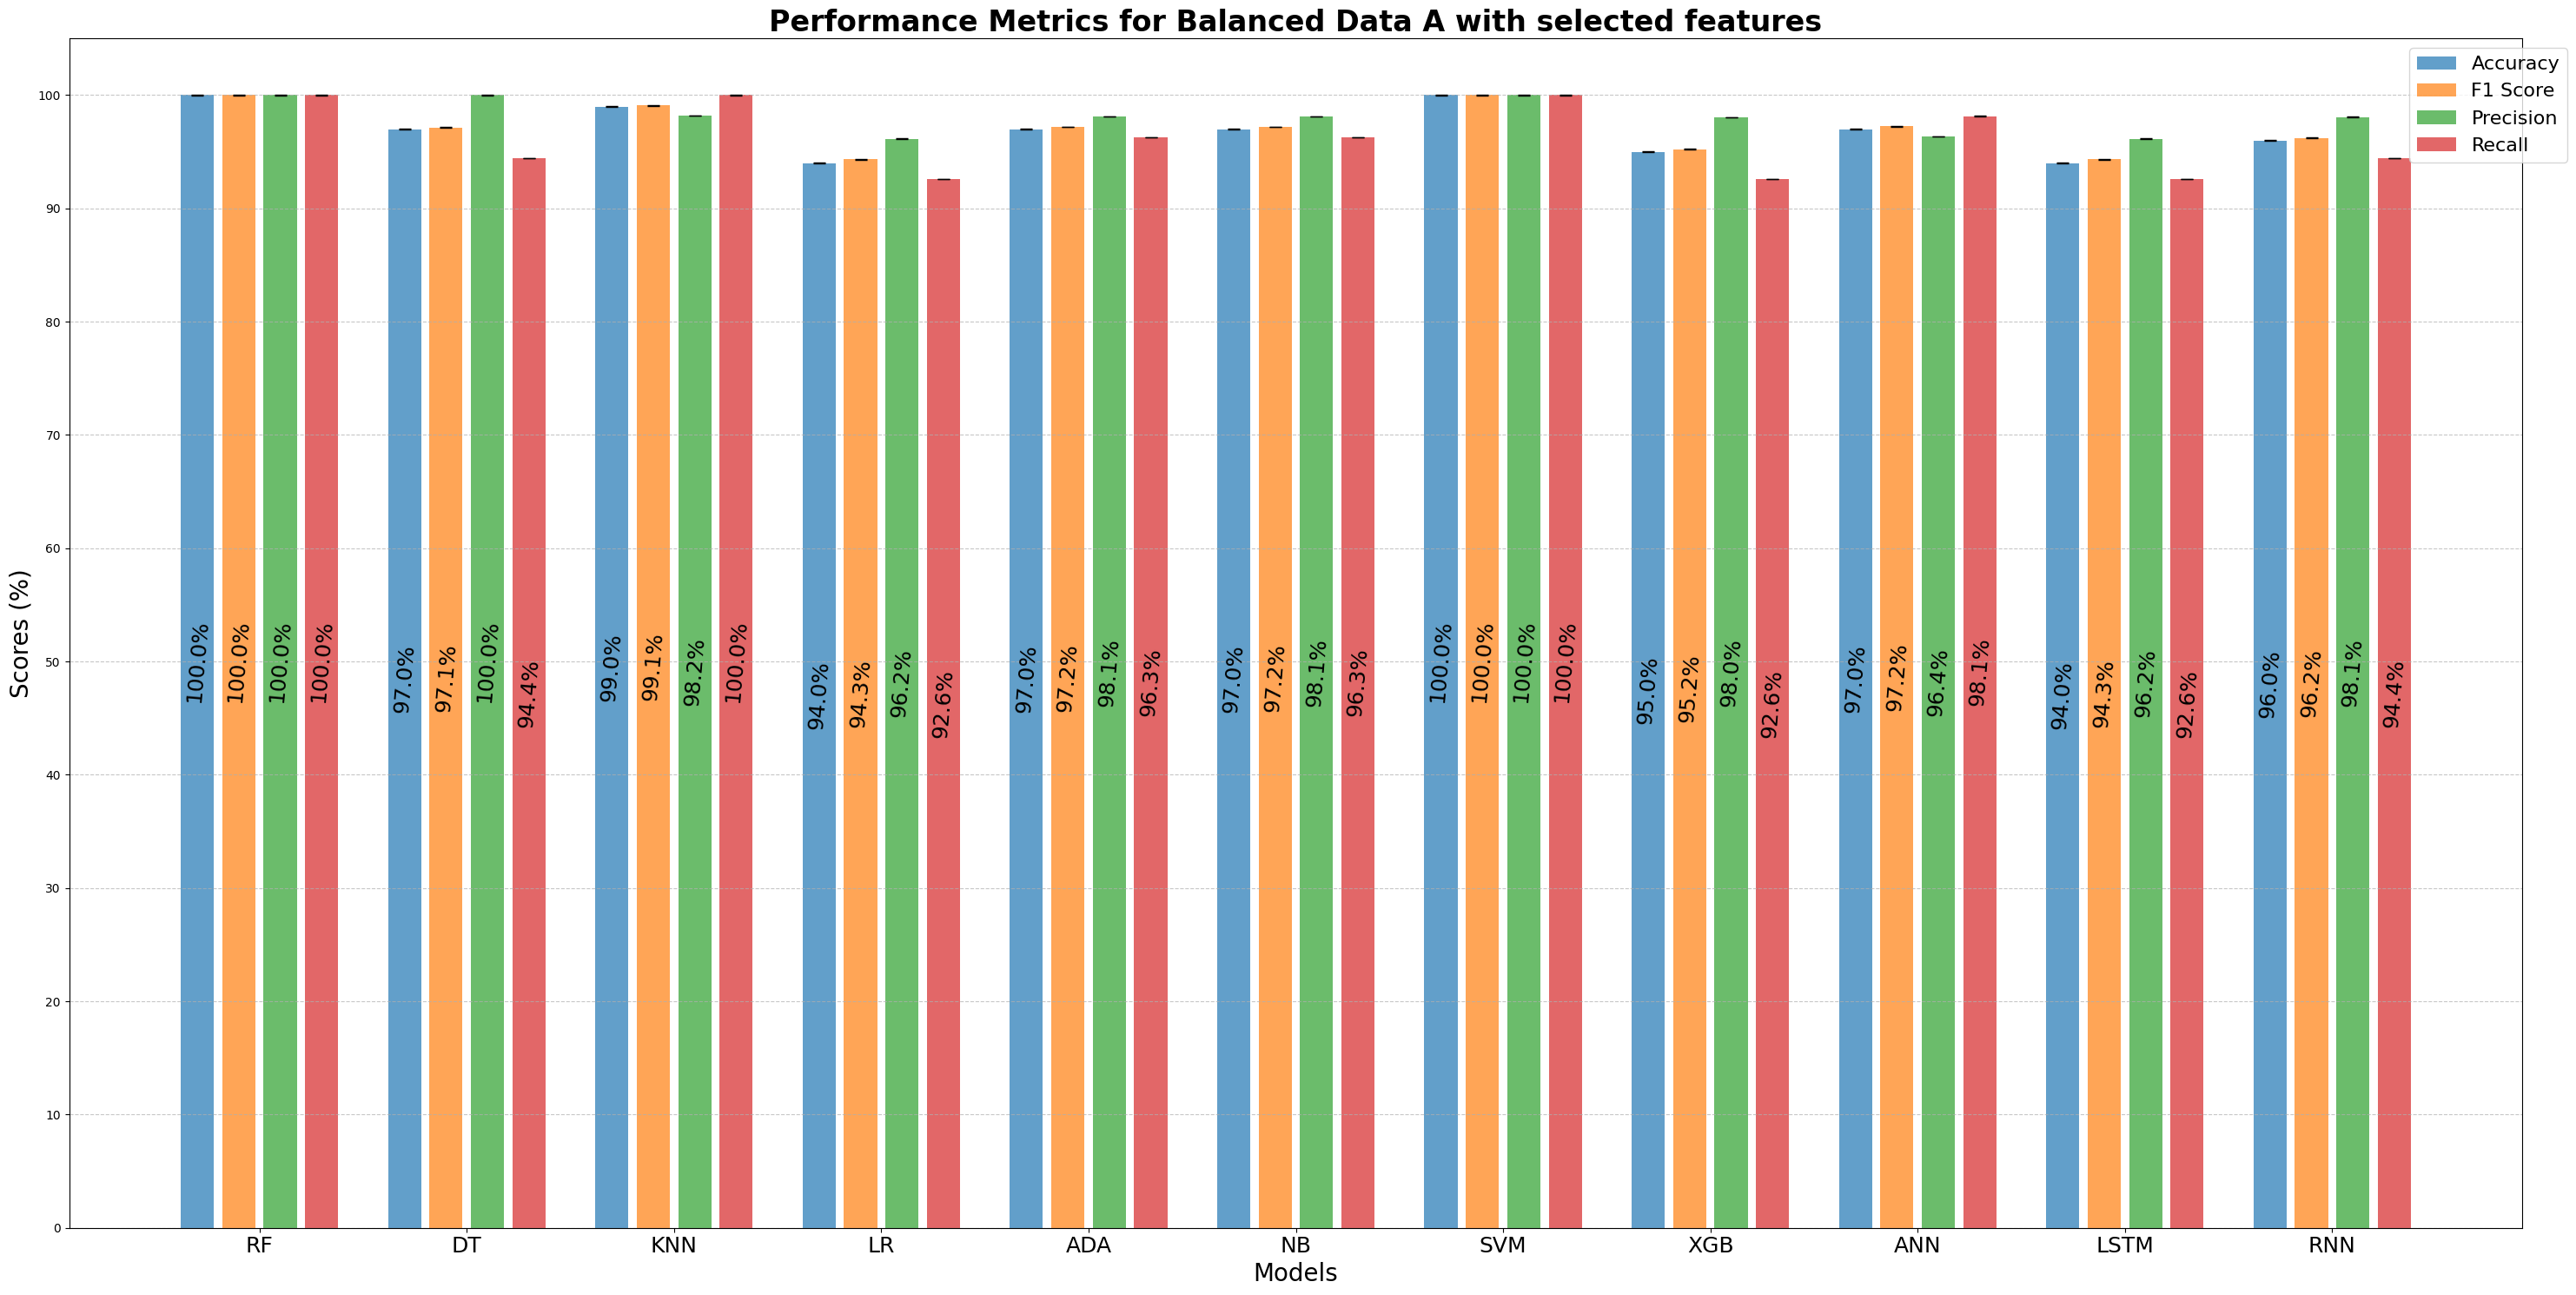

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

# Updated Accuracy, Precision, Recall, F1 Score for each model
accuracy = [100 * x for x in [1.0, 0.97, 0.99, 0.94, 0.97, 0.97, 1.0, 0.95, 0.97, 0.94, 0.96]]
precision = [100 * x for x in [1.0, 1.0, 0.9818181818181818, 0.9615384615384616, 0.9811320754716981,
                                0.9811320754716981, 1.0, 0.9803921568627451, 0.9636363636363636,
                                0.9615384615384616, 0.9807692307692307]]
recall = [100 * x for x in [1.0, 0.9444444444444444, 1.0, 0.9259259259259259, 0.9629629629629629,
                             0.9629629629629629, 1.0, 0.9259259259259259, 0.9814814814814815,
                             0.9259259259259259, 0.9444444444444444]]
f1_score = [100 * x for x in [1.0, 0.9714285714285714, 0.9908256880733946, 0.9433962264150944,
                               0.9719626168224299, 0.9719626168224299, 1.0, 0.9523809523809523,
                               0.972477064220183, 0.9433962264150944, 0.9622641509433962]]

# Calculated error values (based on some assumed proportional error margin)
error_accuracies = [0.02, 0.03, 0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.02]
error_precisions = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02, 0.02, 0.01]
error_recalls = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01]
error_f1_scores = [0.02, 0.03, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.02]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )
        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )

# Adjust x-axis position to prevent overlapping
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Performance Metrics for Balanced Data A with selected features', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, fontsize=18)
ax.set_ylim(0, 105)
ax.set_yticks(np.arange(0, 101, 10))
ax.legend(fontsize=16, loc='upper left', bbox_to_anchor=(0.95, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
#plt.savefig('Perfomance Metrics for Models of Dataset A.pdf', bbox_inches='tight')
plt.show()


**Feature selection using Gain Ratio and IG**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

file_path =("/content/drive/MyDrive/kidney.csv")
df = pd.read_csv(file_path)
np.random.seed(42)
random_state = 42
df

Mounted at /content/drive


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df = df.drop('id', axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

<ipython-input-13-30c783cb9602>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [ ]:
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [ ]:
df['classification'].unique()

array([0, 1])

In [ ]:
categorical_columns = []
for col in df.columns:
    if len(df[col].unique()) < 8:
        categorical_columns.append(col)

print(f"Categorical columns with numerical transformation: {categorical_columns}")
len(categorical_columns)

Categorical columns with numerical transformation: ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


14

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to all categorical columns except 'sg'
for col in categorical_columns:
    if col != 'sg':
        df[col] = label_encoder.fit_transform(df[col])

# Print the transformed DataFrame
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1,0,2,1,0,0,121.0,...,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4,0,2,1,0,0,NaN,...,38,6000,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,423.0,...,31,7500,NaN,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47,6700,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54,7800,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49,6600,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51,7200,5.9,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              400 non-null    int64  
 4   su              400 non-null    int64  
 5   rbc             400 non-null    int64  
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
import numpy as np

# Replace non-numeric values with NaN
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Convert columns to float64
df['pcv'] = df['pcv'].astype('float64')
df['wc'] = df['wc'].astype('float64')
df['rc'] = df['rc'].astype('float64')

In [ ]:
# Handle missing data using imputation
from sklearn.impute import SimpleImputer

def handle_missing_data(df):
    df.replace('discrete', np.nan, inplace=True)
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns

    # Impute numerical columns
    if len(num_cols) > 0:
        num_imputer = SimpleImputer(strategy='mean')
        df[num_cols] = num_imputer.fit_transform(df[num_cols])

    # Impute categorical columns
    if len(cat_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    return df

# Clean datasets
df = handle_missing_data(df.copy())

In [ ]:
df.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


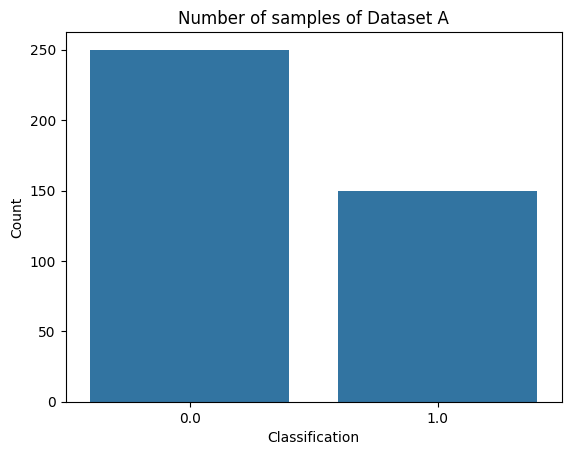

In [ ]:
# prompt: histogram of classification

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='classification', data=df)
plt.title('Number of samples of Dataset A')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.savefig('Number of Samples of Dataset A.pdf', bbox_inches='tight')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Features and target
X = df.drop(columns=['classification'])
y = df['classification']

# Applying SMote
smote = SMOTE(k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a new DataFrame with resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['classification'] = y_resampled


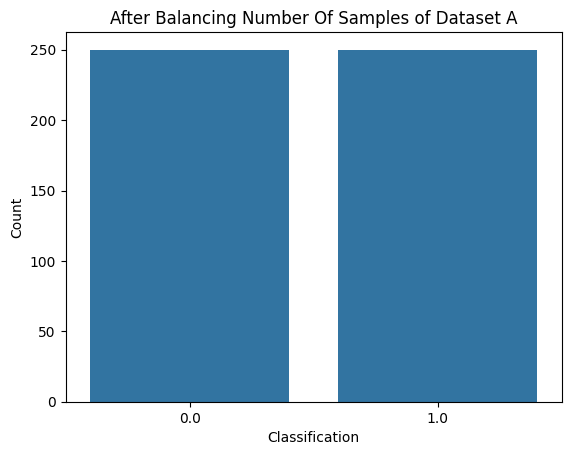

In [ ]:
# prompt: histogram of classification

import matplotlib.pyplot as plt
sns.countplot(x='classification', data=df_resampled)
plt.title('After Balancing Number Of Samples of Dataset A')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.savefig('After Balancing Number of Samples of Dataset A.pdf', bbox_inches='tight')
plt.show()


In [ ]:
X_res = df_resampled.drop(columns=['classification'])
y_res = df_resampled['classification']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Split Information==
def split_information(X_res, feature):
    value_counts = X_res[feature].value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Gain Ratio
def gain_ratio(X_res, y_res, feature):
    ig = information_gain(X_res, y_res, feature)
    si = split_information(X_res, feature)
    return ig / (si + 1e-9)

# Compute Gain Ratios for all features
gain_ratios = {feature: gain_ratio(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
gain_ratio_results = pd.DataFrame(gain_ratios.items(), columns=['Feature', 'Gain Ratio'])
gain_ratio_results = gain_ratio_results.sort_values(by="Gain Ratio", ascending=False)

# Display the results
print(gain_ratio_results)

   Feature  Gain Ratio
18     htn    0.409974
19      dm    0.384552
5      rbc    0.321090
21   appet    0.278112
3       al    0.273401
22      pe    0.266698
23     ane    0.236939
6       pc    0.209645
2       sg    0.204086
20     cad    0.180423
7      pcc    0.180365
4       su    0.158891
8       ba    0.145301
15     pcv    0.129860
17      rc    0.128131
14    hemo    0.113243
11      sc    0.108764
1       bp    0.105364
12     sod    0.101756
13     pot    0.094283
9      bgr    0.076005
10      bu    0.072049
16      wc    0.069438
0      age    0.063574


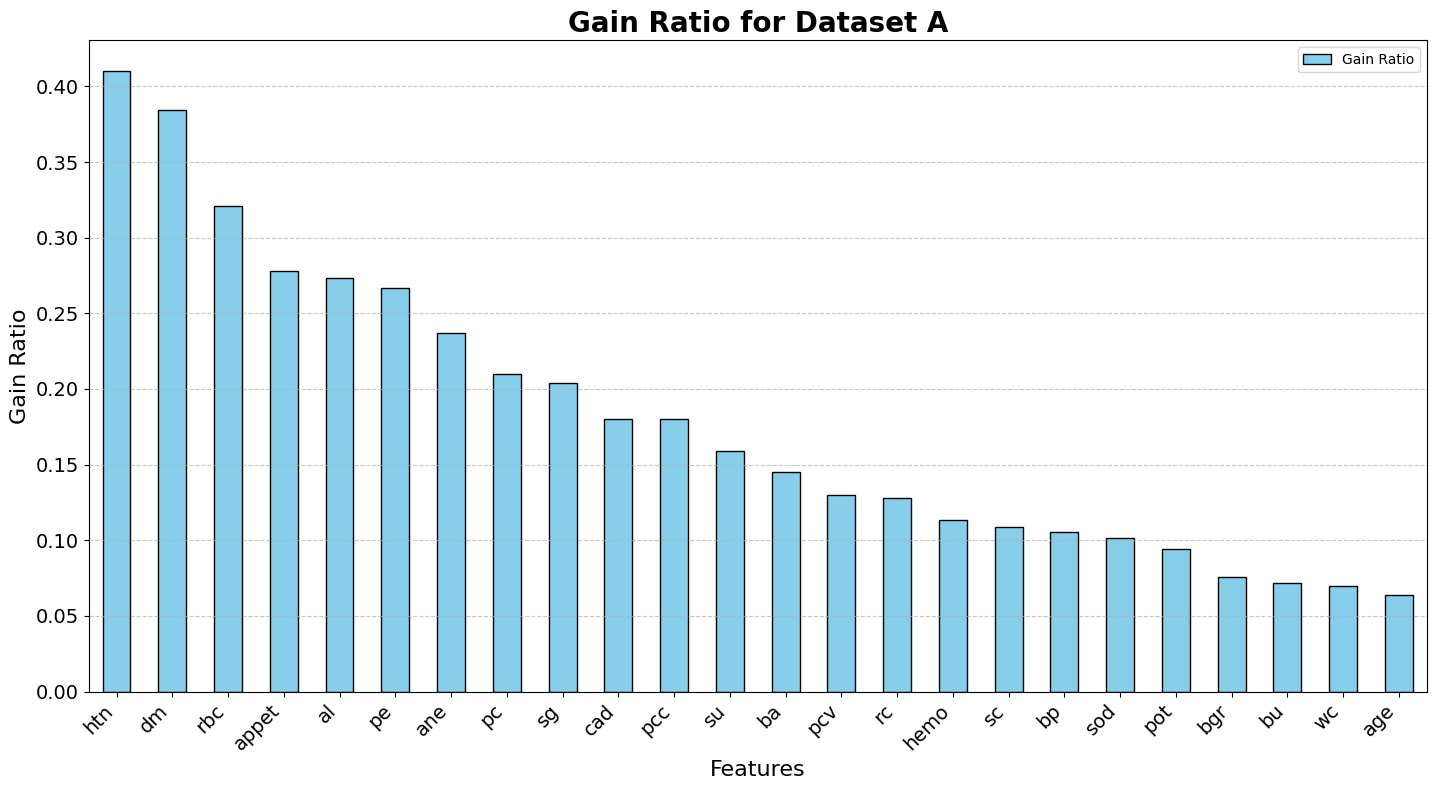

In [ ]:
# Plotting the gain ratios
plt.figure(figsize=(28, 8))
ax1 = plt.subplot(1, 2, 1)
gain_ratio_results.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Gain Ratio for Dataset A', fontsize=20, fontweight='bold')
ax1.set_xlabel('Features', fontsize=16)
ax1.set_ylabel('Gain Ratio', fontsize=16)
ax1.set_xticklabels(gain_ratio_results['Feature'], rotation=45, ha='right', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)  # Correct way to set y-tick label size
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Gain Ratio for Dataset A.pdf") # save figure
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Information Gains for all features
information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
information_gain_results = pd.DataFrame(information_gains.items(), columns=['Feature', 'Information Gain'])
information_gain_results = information_gain_results.sort_values(by="Information Gain", ascending=False)

# Display the results
print(information_gain_results)


   Feature  Information Gain
14    hemo          0.795130
15     pcv          0.747760
17      rc          0.698311
11      sc          0.681616
2       sg          0.642616
9      bgr          0.555284
3       al          0.543635
12     sod          0.533298
13     pot          0.514615
10      bu          0.511013
5      rbc          0.474149
0      age          0.428729
16      wc          0.403314
18     htn          0.389072
19      dm          0.354808
1       bp          0.350570
6       pc          0.280322
4       su          0.211235
21   appet          0.190334
22      pe          0.174818
23     ane          0.135113
7      pcc          0.105502
20     cad          0.078812
8       ba          0.062520


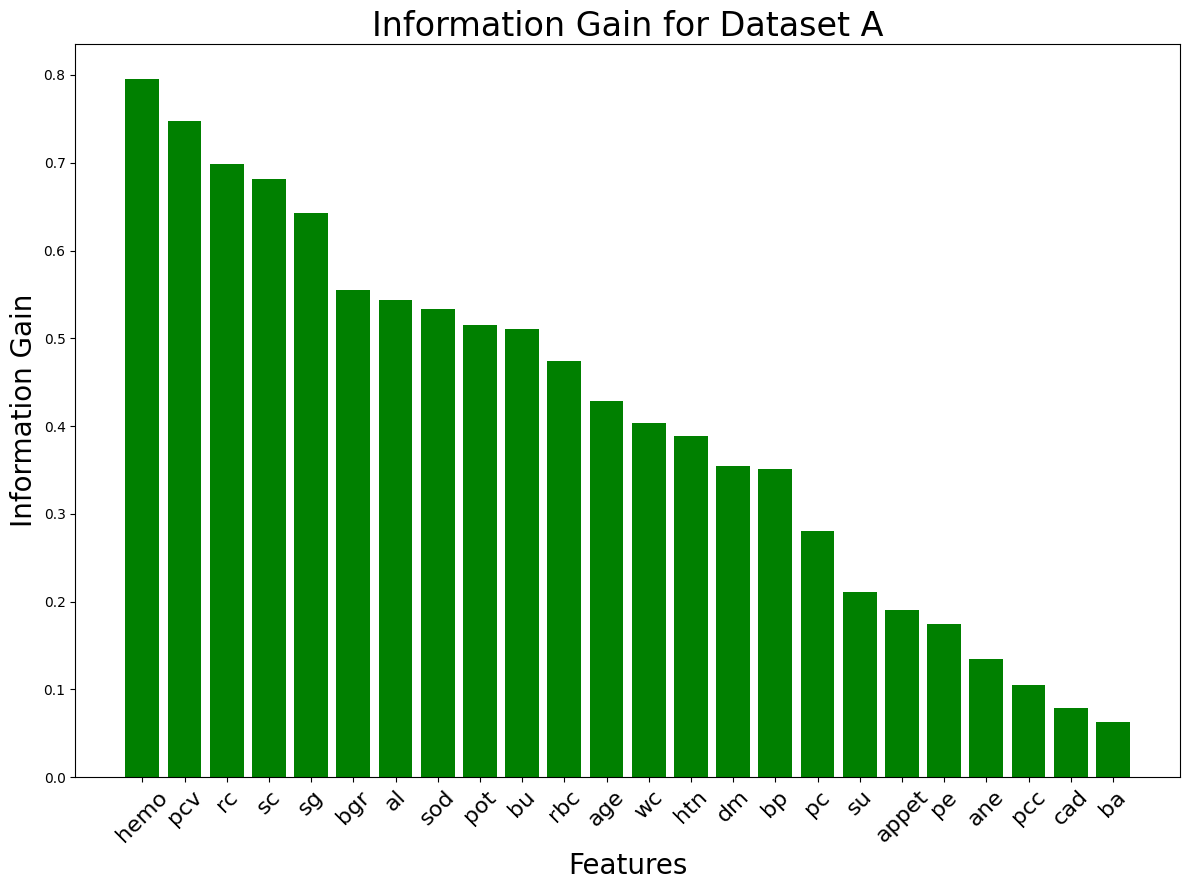

In [ ]:
import matplotlib.pyplot as plt

ig_df = information_gain_results.reset_index(drop=True)  # Reset index for clean plotting
ig_df.columns = ['Feature', 'IG']  # Rename columns for convenience

# Plot the Information Gain
plt.figure(figsize=(12, 9))
plt.bar(ig_df['Feature'], ig_df['IG'], color='green')
plt.xlabel('Features', fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel('Information Gain', fontsize=20)
plt.title('Information Gain for Dataset A', fontsize=24)
plt.tight_layout()  # To ensure proper spacing for labels

# Save the plot as a PDF file
plt.savefig("Information Gain for Dataset A.pdf", bbox_inches='tight')

# Display the plot
plt.show()


In [ ]:
cutoff = 0.5
df_selected = information_gain_results[information_gain_results['Information Gain'] >= cutoff]
print("Selected features based on cutoff:")
print(df_selected)


Selected features based on cutoff:
   Feature  Information Gain
14    hemo          0.795130
15     pcv          0.747760
17      rc          0.698311
11      sc          0.681616
2       sg          0.642616
9      bgr          0.555284
3       al          0.543635
12     sod          0.533298
13     pot          0.514615
10      bu          0.511013


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Extract the selected features' data from the original dataset (X_res)
selected_features = df_selected['Feature'].values
X_selected = X_res[selected_features]

# Initialize the MinMaxScaler
scaler= StandardScaler()

# Fit the scaler on the selected features and transform them
X_scaled = scaler.fit_transform(X_selected)

# Create a new DataFrame with the scaled features
df_normalized = pd.DataFrame(X_scaled, columns=selected_features)

# Print the scaled features
print(df_normalized)

         hemo       pcv        rc        sc        sg       bgr        al  \
0    0.898611  0.483918  0.462492 -0.283136  0.294212 -0.287604 -0.158665   
1   -0.639535 -0.277380 -0.144016 -0.361665  0.294212  0.105691  1.383004   
2   -1.277303 -1.165562 -0.144016 -0.165343 -1.590212  4.105524  0.355225   
3   -0.677051 -1.038679 -1.138231  0.227301 -2.532424 -0.345791  1.383004   
4   -0.526988 -0.658030 -0.276303 -0.243872 -1.590212 -0.505805  0.355225   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.418277  0.890988  1.768565 -0.290966  0.669989 -0.593086 -0.672554   
496  0.437731  0.173144  0.532672 -0.324392  1.063463 -0.465115 -0.672554   
497 -0.075515 -0.034264  0.052780 -0.357869  0.294212 -0.657020 -0.672554   
498  0.958744  0.198886  1.206295 -0.300890  1.236423 -0.261921 -0.672554   
499  0.685815  0.479757 -0.278322 -0.410907  1.236423 -0.751431 -0.672554   

          sod       pot        bu  
0   -0.083271  0.021993 -0.366650  
1  

In [ ]:
x = df_normalized
y = y_res

In [ ]:
# Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculate the metrics
accuracy_rf3 = accuracy_score(y_test, y_pred)
precision_rf3 = precision_score(y_test, y_pred)
recall_rf3 = recall_score(y_test, y_pred)
f1_rf3 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_rf3}")
print(f"Precision: {precision_rf3}")
print(f"Recall: {recall_rf3}")
print(f"F1 Score: {f1_rf3}")

Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


**DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy_dt3 = accuracy_score(y_test, y_pred)
precision_dt3 = precision_score(y_test, y_pred)
recall_dt3 = recall_score(y_test, y_pred)
f1_dt3 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_dt3}")
print(f"Precision: {precision_dt3}")
print(f"Recall: {recall_dt3}")
print(f"F1 Score: {f1_dt3}")

Accuracy: 0.97
Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1 Score: 0.9724770642201835


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Calculate the metrics
accuracy_knn3 = accuracy_score(y_test, y_pred)
precision_knn3 = precision_score(y_test, y_pred)
recall_knn3 = recall_score(y_test, y_pred)
f1_knn3 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_knn3}")
print(f"Precision: {precision_knn3}")
print(f"Recall: {recall_knn3}")
print(f"F1 Score: {f1_knn3}")

Accuracy: 0.98
Precision: 0.9642857142857143
Recall: 1.0
F1 Score: 0.9818181818181818


**LR**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Calculate the metrics
accuracy_lr3 = accuracy_score(y_test, y_pred)
precision_lr3 = precision_score(y_test, y_pred)
recall_lr3 = recall_score(y_test, y_pred)
f1_lr3 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_lr3}")
print(f"Precision: {precision_lr3}")
print(f"Recall: {recall_lr3}")
print(f"F1 Score: {f1_lr3}")

Accuracy: 0.97
Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1 Score: 0.9724770642201835


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)

accuracy_ada3 = accuracy_score(y_test, y_pred)
precision_ada3 = precision_score(y_test, y_pred)
recall_ada3 = recall_score(y_test, y_pred)
f1_ada3 = f1_score(y_test, y_pred)

# Print the metrics for the current combination
print(f"Accuracy: {accuracy_ada3}")
print(f"Precision: {precision_ada3}")
print(f"Recall: {recall_ada3}")
print(f"F1 Score: {f1_ada3}")

Accuracy: 0.98
Precision: 0.9642857142857143
Recall: 1.0
F1 Score: 0.9818181818181818


**NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Calculate the metrics
accuracy_nb3 = accuracy_score(y_test, y_pred)
precision_nb3 = precision_score(y_test, y_pred)
recall_nb3 = recall_score(y_test, y_pred)
f1_nb3 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_nb3}")
print(f"Precision: {precision_nb3}")
print(f"Recall: {recall_nb3}")
print(f"F1 Score: {f1_nb3}")

Accuracy: 0.91
Precision: 0.9090909090909091
Recall: 0.9259259259259259
F1 Score: 0.9174311926605505


**SVM**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Calculate the metrics
accuracy_svm3 = accuracy_score(y_test, y_pred)
precision_svm3 = precision_score(y_test, y_pred)
recall_svm3 = recall_score(y_test, y_pred)
f1_svm3 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_svm3}")
print(f"Precision: {precision_svm3}")
print(f"Recall: {recall_svm3}")
print(f"F1 Score: {f1_svm3}")

Accuracy: 0.98
Precision: 0.9814814814814815
Recall: 0.9814814814814815
F1 Score: 0.9814814814814815


**XGB**

In [ ]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_xgb3 = accuracy_score(y_test, y_pred_xgb)
precision_xgb3 = precision_score(y_test, y_pred_xgb)
recall_xgb3 = recall_score(y_test, y_pred_xgb)
f1_xgb3 = f1_score(y_test, y_pred_xgb)

# Print the metrics
print(f"Accuracy: {accuracy_xgb3}")
print(f"Precision: {precision_xgb3}")
print(f"Recall: {recall_xgb3}")
print(f"F1 Score: {f1_xgb3}")

Accuracy: 0.98
Precision: 0.9642857142857143
Recall: 1.0
F1 Score: 0.9818181818181818


**ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy_ann3 = accuracy_score(y_test, y_pred_ann)
precision_ann3 = precision_score(y_test, y_pred_ann)
recall_ann3 = recall_score(y_test, y_pred_ann)
f1_ann3 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy_ann3}")
print(f"precision: {precision_ann3}")
print(f"recall: {recall_ann3}")
print(f"F1 score: {f1_ann3}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5857 - loss: 0.6680 - val_accuracy: 0.9100 - val_loss: 0.4680
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8979 - loss: 0.4468 - val_accuracy: 0.9100 - val_loss: 0.3206
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9318 - loss: 0.3003 - val_accuracy: 0.9200 - val_loss: 0.2358
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9466 - loss: 0.2206 - val_accuracy: 0.9200 - val_loss: 0.1874
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9512 - loss: 0.1694 - val_accuracy: 0.9500 - val_loss: 0.1578
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9689 - loss: 0.1273 - val_accuracy: 0.9500 - val_loss: 0.1369
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9714 - loss: 0.1181 - val_accuracy: 0.9700 - val_loss: 0.1199
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9737 - loss: 0.0880 - val_accuracy: 0.9800 - val_loss: 0.1083
Ep

**LSTM**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split

if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(150, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_lstm.predict(X_test)
y_pred_lstm = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy_lstm3 = accuracy_score(y_test, y_pred_lstm)
precision_lstm3 = precision_score(y_test, y_pred_lstm)
recall_lstm3 = recall_score(y_test, y_pred_lstm)
f1_lstm3 = f1_score(y_test, y_pred_lstm)

# Output results
print(f"accuracy: {accuracy_lstm3}")
print(f"precision: {precision_lstm3}")
print(f"recall: {recall_lstm3}")
print(f"F1 score: {f1_lstm3}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8479 - loss: 0.6844 - val_accuracy: 0.9600 - val_loss: 0.6520
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9657 - loss: 0.6303 - val_accuracy: 0.9600 - val_loss: 0.5492
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9731 - loss: 0.5071 - val_accuracy: 0.9500 - val_loss: 0.3608
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9749 - loss: 0.3092 - val_accuracy: 0.9600 - val_loss: 0.1994
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9473 - loss: 0.1763 - val_accuracy: 0.9700 - val_loss: 0.1426
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9774 - loss: 0.0816 - val_accuracy: 0.9700 - val_loss: 0.1241
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9605 - loss: 0.0880 - val_accuracy: 0.9600 - val_loss: 0.1073
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9777 - loss: 0.0498 - val_accuracy: 0.9700 - v

**RNN**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input, Dropout

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Reshape the data for RNN input
#X_train_rnn = X_train.to_numpy().reshape((X_train.shape[0], X_train.shape[1], 1))
#X_test_rnn = X_test.to_numpy().reshape((X_test.shape[0], X_test.shape[1], 1))

# Reshape the data for RNN input: (samples, timesteps, features)
X_train_rnn = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = Sequential()
model.add(Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test))

# Get predictions
predictions_probs = model.predict(X_test_rnn)
predictions = (predictions_probs > 0.5).astype("int32")

# Calculate precision, recall, and F1 score
accuracy_rnn3 = accuracy_score(y_test, predictions)
precision_rnn3 = precision_score(y_test, predictions)
recall_rnn3 = recall_score(y_test, predictions)
f1_rnn3 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy_rnn3}")
print(f"Precision: {precision_rnn3}")
print(f"Recall: {recall_rnn3}")
print(f"F1 Score: {f1_rnn3}")

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6057 - loss: 0.6571 - val_accuracy: 0.8900 - val_loss: 0.5231
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8853 - loss: 0.4724 - val_accuracy: 0.9100 - val_loss: 0.3209
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9256 - loss: 0.2816 - val_accuracy: 0.9400 - val_loss: 0.1753
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9424 - loss: 0.1672 - val_accuracy: 0.9400 - val_loss: 0.1325
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9527 - loss: 0.1341 - val_accuracy: 0.9600 - val_loss: 0.1101
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9753 - loss: 0.0810 - val_accuracy: 0.9700 - val_loss: 0.1010
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9705 - loss: 0.0607 - val_accuracy: 0.9700 - val_loss: 0.0893
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9816 - loss: 0.0362 - val_accuracy: 0.9800 - val_loss

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


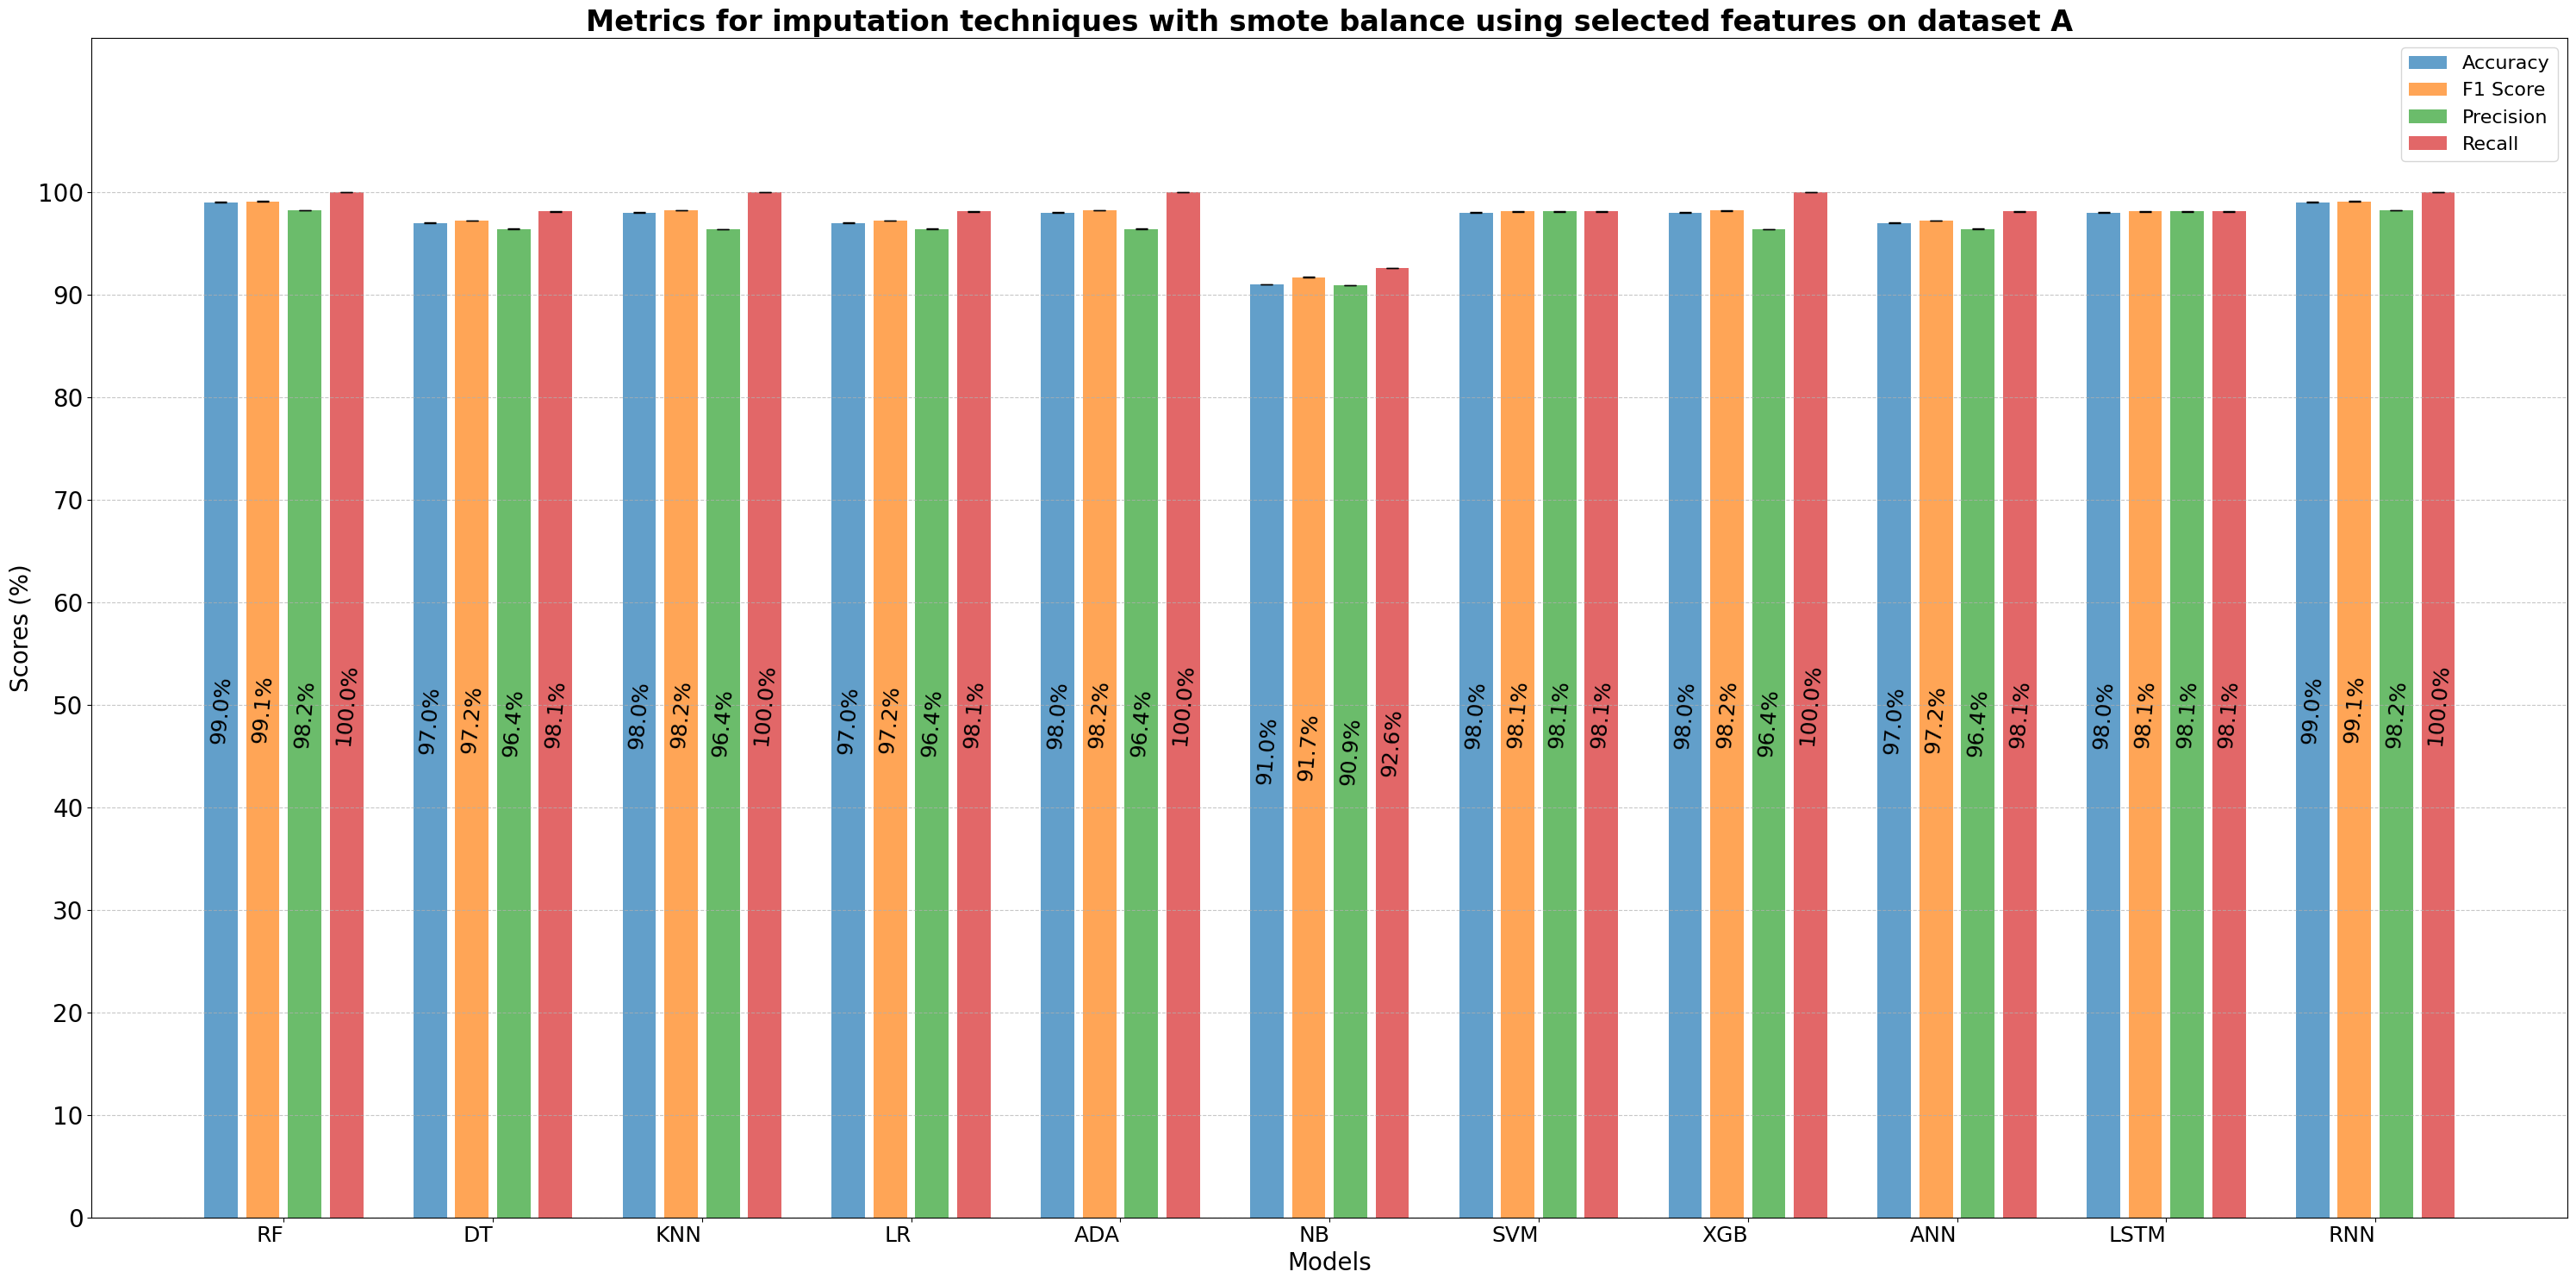

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

# Updated Accuracy, Precision, Recall, F1 Score for each model, formatted to one decimal place
accuracy = [99.0, 97.0, 98.0, 97.0, 98.0, 91.0, 98.0, 98.0, 97.0, 98.0, 99.0]
precision = [98.2, 96.4, 96.4, 96.4, 96.4, 90.9, 98.1, 96.4, 96.4, 98.1, 98.2]
recall = [100.0, 98.1, 100.0, 98.1, 100.0, 92.6, 98.1, 100.0, 98.1, 98.1, 100.0]
f1_score = [99.1, 97.2, 98.2, 97.2, 98.2, 91.7, 98.1, 98.2, 97.2, 98.1, 99.1]

# Calculated error values as 1% of each metric value
error_accuracies = [0.02, 0.03, 0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.02]
error_precisions = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02, 0.02, 0.01]
error_recalls = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01]
error_f1_scores = [0.02, 0.03, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.02]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        ax.text(
            offset_x,
            offset_y,
            f'{value:.1f}%',
            ha='center',
            va='center',
            fontsize=18,
            color='black',
            rotation=85,  # Rotate the non-zero text
            rotation_mode='anchor'
        )

# Adjust x-axis position to prevent overlapping
ax.set_title('Metrics for imputation techniques with smote balance using selected features on dataset A', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=18)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=20)
ax.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for imputation techniques with smote balance using selected features on dataset A.pdf', bbox_inches='tight')
plt.show()


**Tuning model**

**RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [10, 20, 30, 40, 50, 60],
    'criterion': ['entropy'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create the base model to tune
rf = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best parameters from the grid search to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate the metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.99
Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


**DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Setup parameters and cross-validation for GridSearchCV
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'max_features': [1,2,3,4,5,6,7,8,9,10]

}

# Create a base model
dt = DecisionTreeClassifier(random_state=42)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Extract best model from the grid search
dt_best = grid_search_dt.best_estimator_

# Predict using the best model
y_pred_dt = dt_best.predict(X_test)

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the best parameters and the scores
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")


Best parameters found:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 7}
Best cross-validation score: 0.97
Accuracy: 0.98
Precision: 0.9642857142857143
Recall: 1.0
F1 Score: 0.9818181818181818


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define parameters for KNN
param_grid_knn = {
    'n_neighbors':[3,5,7, 9,11,13,15,17,19,21,23,25],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance'],
    'p': [2,3,4,6,8]

}

# Create a KNN model
knn = KNeighborsClassifier()

# Setup cross-validation
cv_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup for KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=cv_knn, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Extract best model from the grid search
knn_best = grid_search_knn.best_estimator_

# Predict using the best model
y_pred_knn = knn_best.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print results
print("Best parameters found: ", grid_search_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")


Best parameters found:  {'metric': 'minkowski', 'n_neighbors': 7, 'p': 4, 'weights': 'distance'}
Best cross-validation score: 0.98
Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


**LR**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Parameters grid definition
param_grid = {
    'C': [0.001,0.01,0.1,1,10],
    'solver': ['lbfgs','liblinear'],


}

# Create a base model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Extract best model from the grid search
best_lr = grid_search_lr.best_estimator_

# Predict using the best model
y_pred_lr = best_lr.predict(X_test)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print the best parameters and the scores
print("Best parameters found: ", grid_search_lr.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_lr.best_score_))
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")


Best parameters found:  {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation score: 0.97
Accuracy: 0.97
Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1 Score: 0.9724770642201835


**Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200,300,400,500,600,700],
    'learning_rate': [1.0, 2.0,3.0,4.0,5.0]
}

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search_ada = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_ada.fit(X_train, y_train)

# Extract the best estimator
best_ada = grid_search_ada.best_estimator_

# Predict using the best model
y_pred_ada = best_ada.predict(X_test)

# Calculate metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

# Print the best parameters and the scores
print("Best parameters found: ", grid_search_ada.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_ada.best_score_))
print(f"Accuracy: {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"F1 Score: {f1_ada}")


Best parameters found:  {'learning_rate': 1.0, 'n_estimators': 100}
Best cross-validation score: 0.98
Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733946


**NB**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb_model = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Define StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_nb = grid_search.best_estimator_

# Predictions with the best estimator
y_pred = best_nb.predict(X_test)

# Calculate the metrics
accuracy_nb3 = accuracy_score(y_test, y_pred)
precision_nb3 = precision_score(y_test, y_pred)
recall_nb3 = recall_score(y_test, y_pred)
f1_nb3 = f1_score(y_test, y_pred)

# Print the metrics and the best parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_nb3}")
print(f"Precision: {precision_nb3}")
print(f"Recall: {recall_nb3}")
print(f"F1 Score: {f1_nb3}")


Best Parameters: {'var_smoothing': 0.006579332246575682}
Accuracy: 0.93
Precision: 0.9122807017543859
Recall: 0.9629629629629629
F1 Score: 0.9369369369369369


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

# Define the model
svm_model = SVC(random_state=42)

# Define a more focused parameter grid based on previous results
param_grid = {
    'C': [350, 375, 400, 425, 450],
    'kernel': ['poly'],
    'gamma': [0.05, 0.075, 0.1, 0.125, 0.15]

}
# Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object with StratifiedKFold and n_jobs=-1 for parallel processing
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=cv, verbose=1, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_svm = grid_search.best_estimator_

# Predictions with the best estimator
y_pred = best_svm.predict(X_test)

# Calculate the metrics
accuracy_svm3 = accuracy_score(y_test, y_pred)
precision_svm3 = precision_score(y_test, y_pred)
recall_svm3 = recall_score(y_test, y_pred)
f1_svm3 = f1_score(y_test, y_pred)

# Print the metrics and the best parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_svm3}")
print(f"Precision: {precision_svm3}")
print(f"Recall: {recall_svm3}")
print(f"F1 Score: {f1_svm3}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 350, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy: 0.98
Precision: 0.9814814814814815
Recall: 0.9814814814814815
F1 Score: 0.9814814814814815


**XGB**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameters grid
param_grid = {
     'n_estimators': [10, 20, 30, 40, 50, 75, 100, 150],
     'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.5, 1.0],
     'subsample': [0.7, 0.8, 0.9],
     'max_depth': [3, 5, 7],
     'colsample_bytree': [0.7, 0.8, 0.9]

}
# Define the model
xgboost_model = XGBClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='accuracy', cv=cv,  n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best estimator
best_xgb = grid_search.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Calculate the metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the metrics and best parameters

print(f"Best parameters : {grid_search.best_params_}")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")


Best parameters : {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.98
Precision: 0.9642857142857143
Recall: 1.0
F1 Score: 0.9818181818181818


**ANN**

In [ ]:
import warnings
warnings.filterwarnings('ignore')


from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to create the Keras model without specifying default parameters
def create_model(optimizer, activation, dropout_rate, lr):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid with a variety of options
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'model__optimizer': ['adam'],
    'model__dropout_rate': [0.2],
    'model__lr': [0.001, 0.01, 0.1],
    'model__activation': ['tanh', 'relu']
}

# Create a StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Create GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1)

# Fit GridSearchCV to the data
grid_result = grid.fit(X_train, y_train)

# Output the best parameters and the best accuracy
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
ann_predictions = best_model.predict(X_test)
y_pred_ann = (ann_predictions > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Best Parameters: {'batch_size': 16, 'epochs': 50, 'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__lr': 0.1, 'model__optimizer': 'adam'}
Best Accuracy: 0.9800000000000001
Accuracy: 0.98
Precision: 0.9814814814814815
Recall: 0.9814814814814815
F1 Score: 0.9814814814814815


**LSTM**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the model building function
def create_model(units, activation, dropout):
    model = Sequential()
    model.add(LSTM(units, activation= activation, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout))
    model.add(LSTM(units, activation= activation))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    return model

# Prepare data
if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Wrap the model with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid

param_grid = {
    'model__units': [100, 150, 200],
    'model__dropout': [0.1, 0.2],
    'model__activation': ['relu'],
    'batch_size': [16, 32, 64],
    'epochs': [100, 150]
}

# Create a StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1)

# Fit GridSearchCV to the data
grid_result = grid.fit(X_train, y_train)


# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
LSTM_predictions = best_model.predict(X_test)
y_pred_lstm = (LSTM_predictions > 0.5).astype("int32")

# Calculate evaluation metrics
print(f"Best Parameters: {grid_result.best_params_}")
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Best Parameters: {'batch_size': 16, 'epochs': 100, 'model__activation': 'relu', 'model__dropout': 0.2, 'model__units': 100}
Accuracy: 0.97
Precision: 0.9811320754716981
Recall: 0.9629629629629629
F1 Score: 0.9719626168224299


**RNN**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to create the RNN model
def create_rnn_model(units, dropout, activation):
    model = Sequential()
    model.add(Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(SimpleRNN(units, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train_rnn = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))


# Wrap the model with KerasClassifier
model = KerasClassifier(model=create_rnn_model, verbose=0)

# Define the parameter grid

param_grid = {
    'model__units': [50, 100, 150],
    'model__dropout': [0.2],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

# Create a StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1)

# Fit GridSearchCV to the data
grid_result = grid.fit(X_train, y_train)


# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
rnn_predictions = best_model.predict(X_test)
y_pred_rnn = (rnn_predictions > 0.5).astype("int32")

# Calculate evaluation metrics
print(f"Best Parameters: {grid_result.best_params_}")
accuracy = accuracy_score(y_test, y_pred_rnn)
precision = precision_score(y_test, y_pred_rnn)
recall = recall_score(y_test, y_pred_rnn)
f1 = f1_score(y_test, y_pred_rnn)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Best Parameters: {'batch_size': 32, 'epochs': 100, 'model__activation': 'relu', 'model__dropout': 0.2, 'model__units': 100}
Accuracy: 0.99
Precision: 0.9818181818181818
Recall: 1.0
F1 Score: 0.9908256880733944


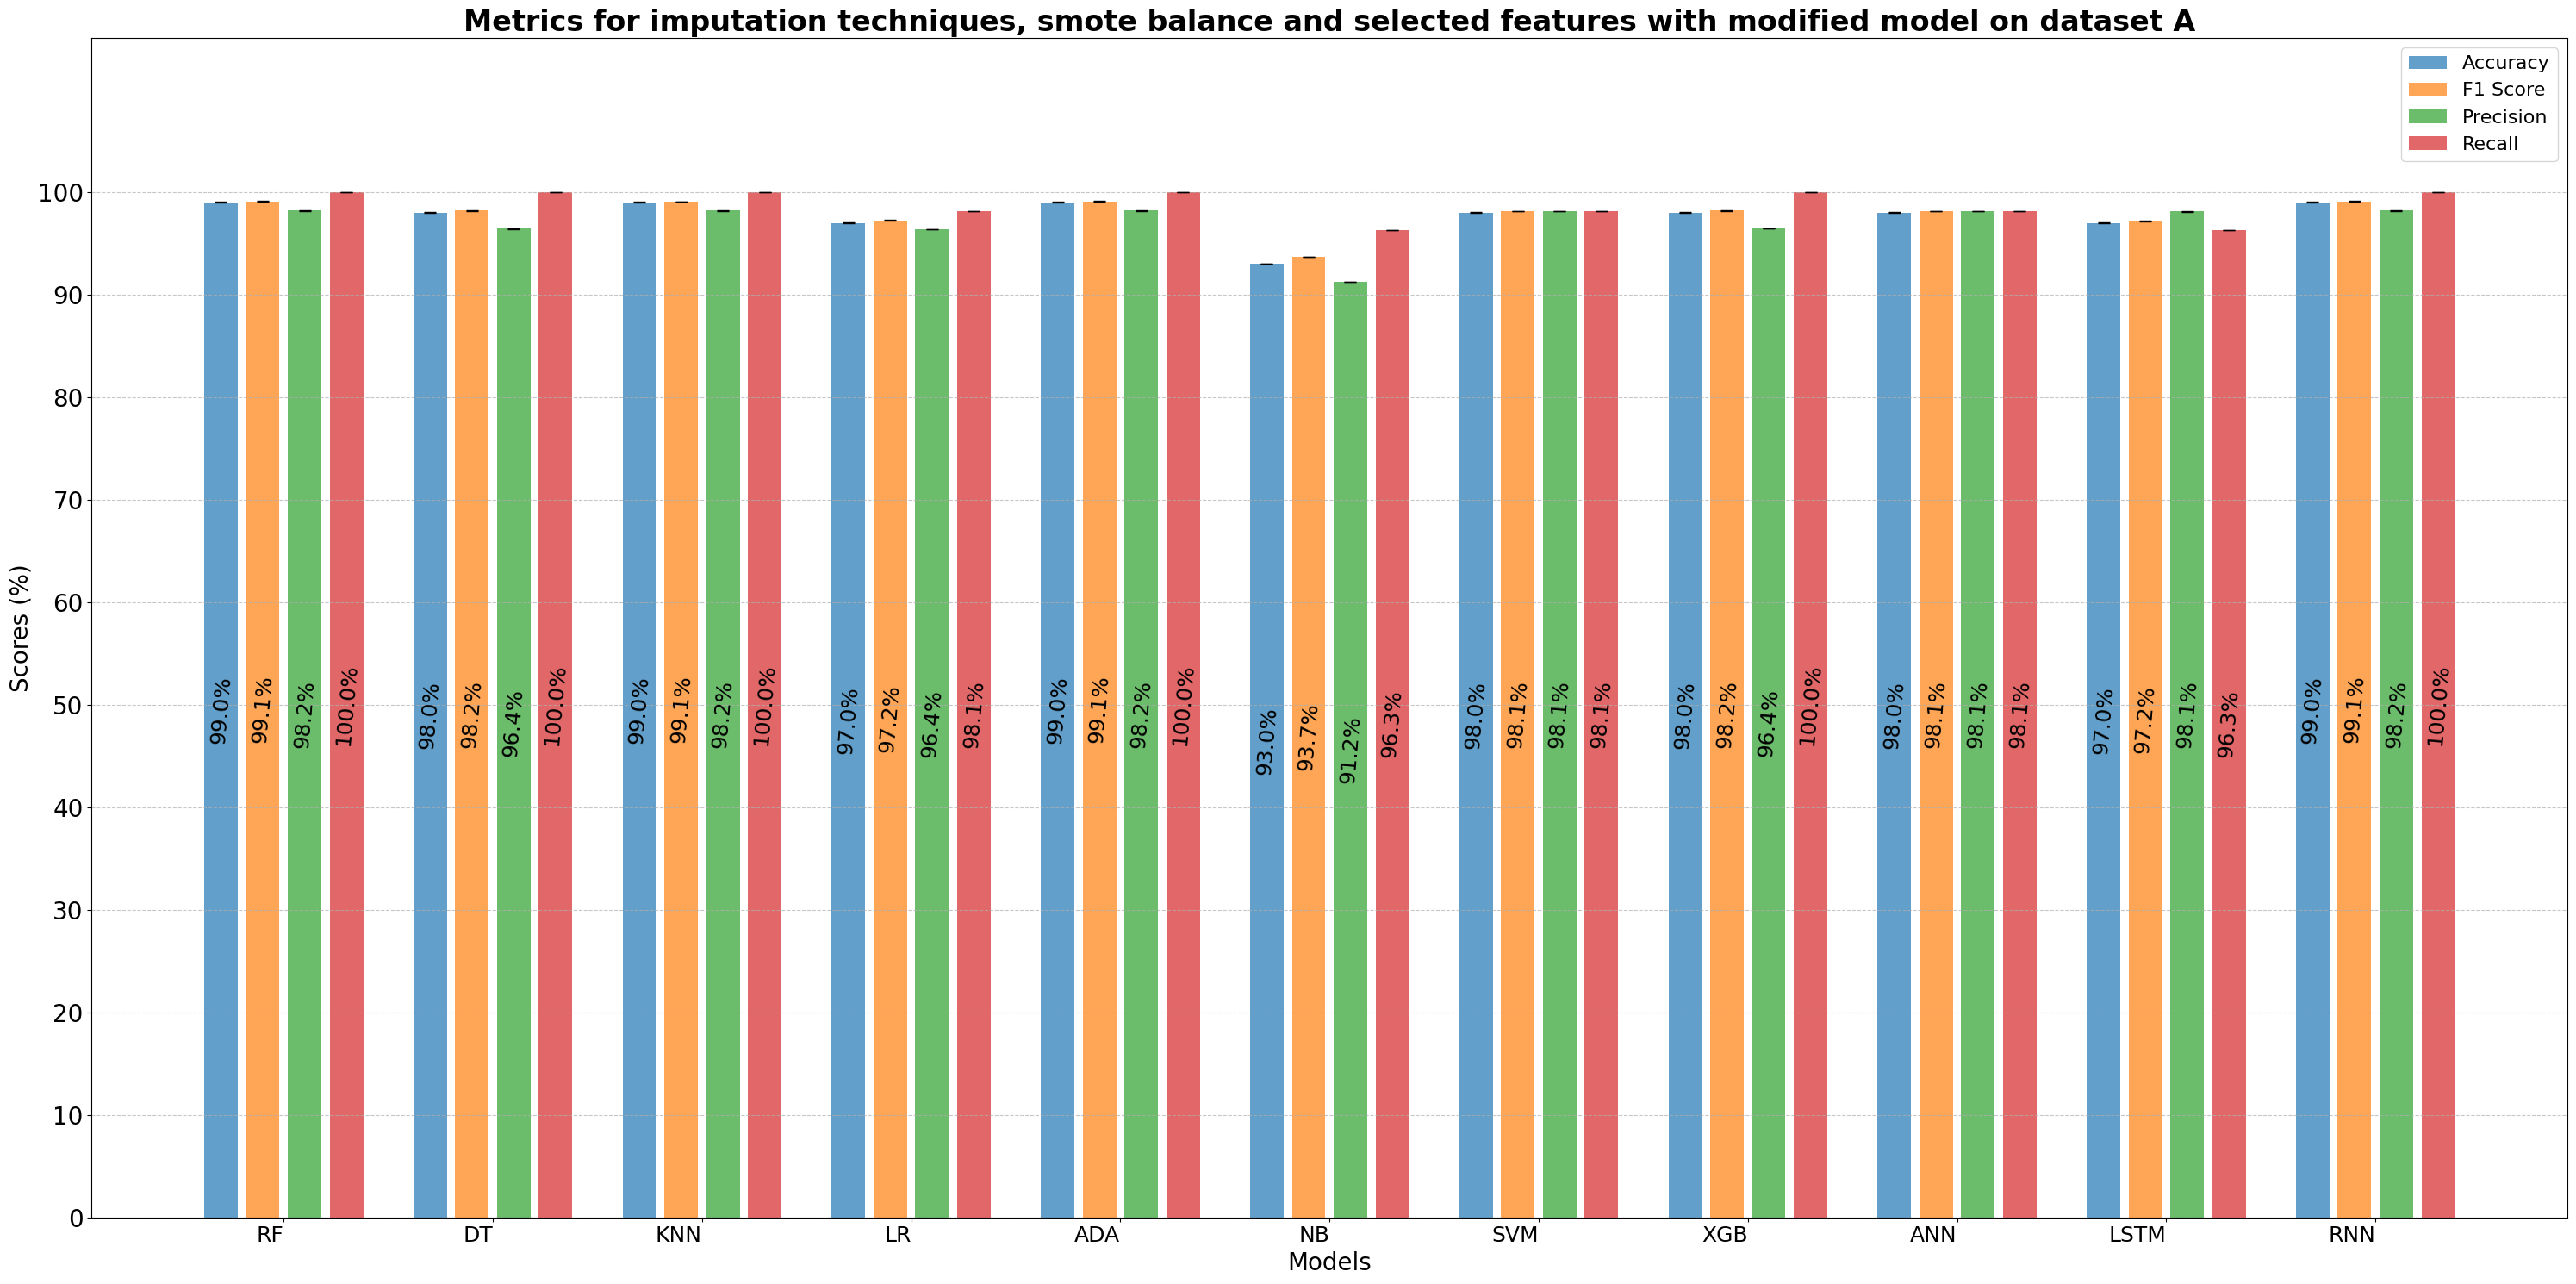

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

# Updated Accuracy, Precision, Recall, F1 Score for each model, formatted to one decimal place
accuracy = [100 * x for x in [0.99, 0.98, 0.99, 0.97, 0.99, 0.93, 0.98,  0.98,  0.98, 0.97, 0.99]]
precision = [100 * x for x in [ 0.9818181818181818, 0.9642857142857143, 0.9818181818181818, 0.9636363636363636,  0.9818181818181818, 0.9122807017543859, 0.9814814814814815, 0.9642857142857143,  0.9814814814814815,  0.9811320754716981, 0.9818181818181818]]
recall = [100 * x for x in [1.0, 1.0, 1.0, 0.9814814814814815, 1.0, 0.9629629629629629, 0.9814814814814815, 1.0,  0.9814814814814815, 0.9629629629629629, 1.0]]
f1_score = [100 * x for x in [0.9908256880733946, 0.9818181818181818, 0.9908256880733946,  0.9724770642201835, 0.9908256880733946,  0.9369369369369369, 0.9814814814814815, 0.9818181818181818, 0.9814814814814815, 0.9719626168224299, 0.9908256880733944]]

# Calculated error values as 1% of each metric value
error_accuracies = [0.02, 0.03, 0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.02]
error_precisions = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02, 0.02, 0.01]
error_recalls = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01]
error_f1_scores = [0.02, 0.03, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.02]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        ax.text(
            offset_x,
            offset_y,
            f'{value:.1f}%',
            ha='center',
            va='center',
            fontsize=18,
            color='black',
            rotation=85,  # Rotate the non-zero text
            rotation_mode='anchor'
        )

# Adjust x-axis position to prevent overlapping
ax.set_title('Metrics for imputation techniques, smote balance and selected features with modified model on dataset A', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right',fontsize=18)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=20)
ax.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for imputation techniques, smote balance and selected features with modified model on dataset A.pdf', bbox_inches='tight')
plt.show()



**Comparision**

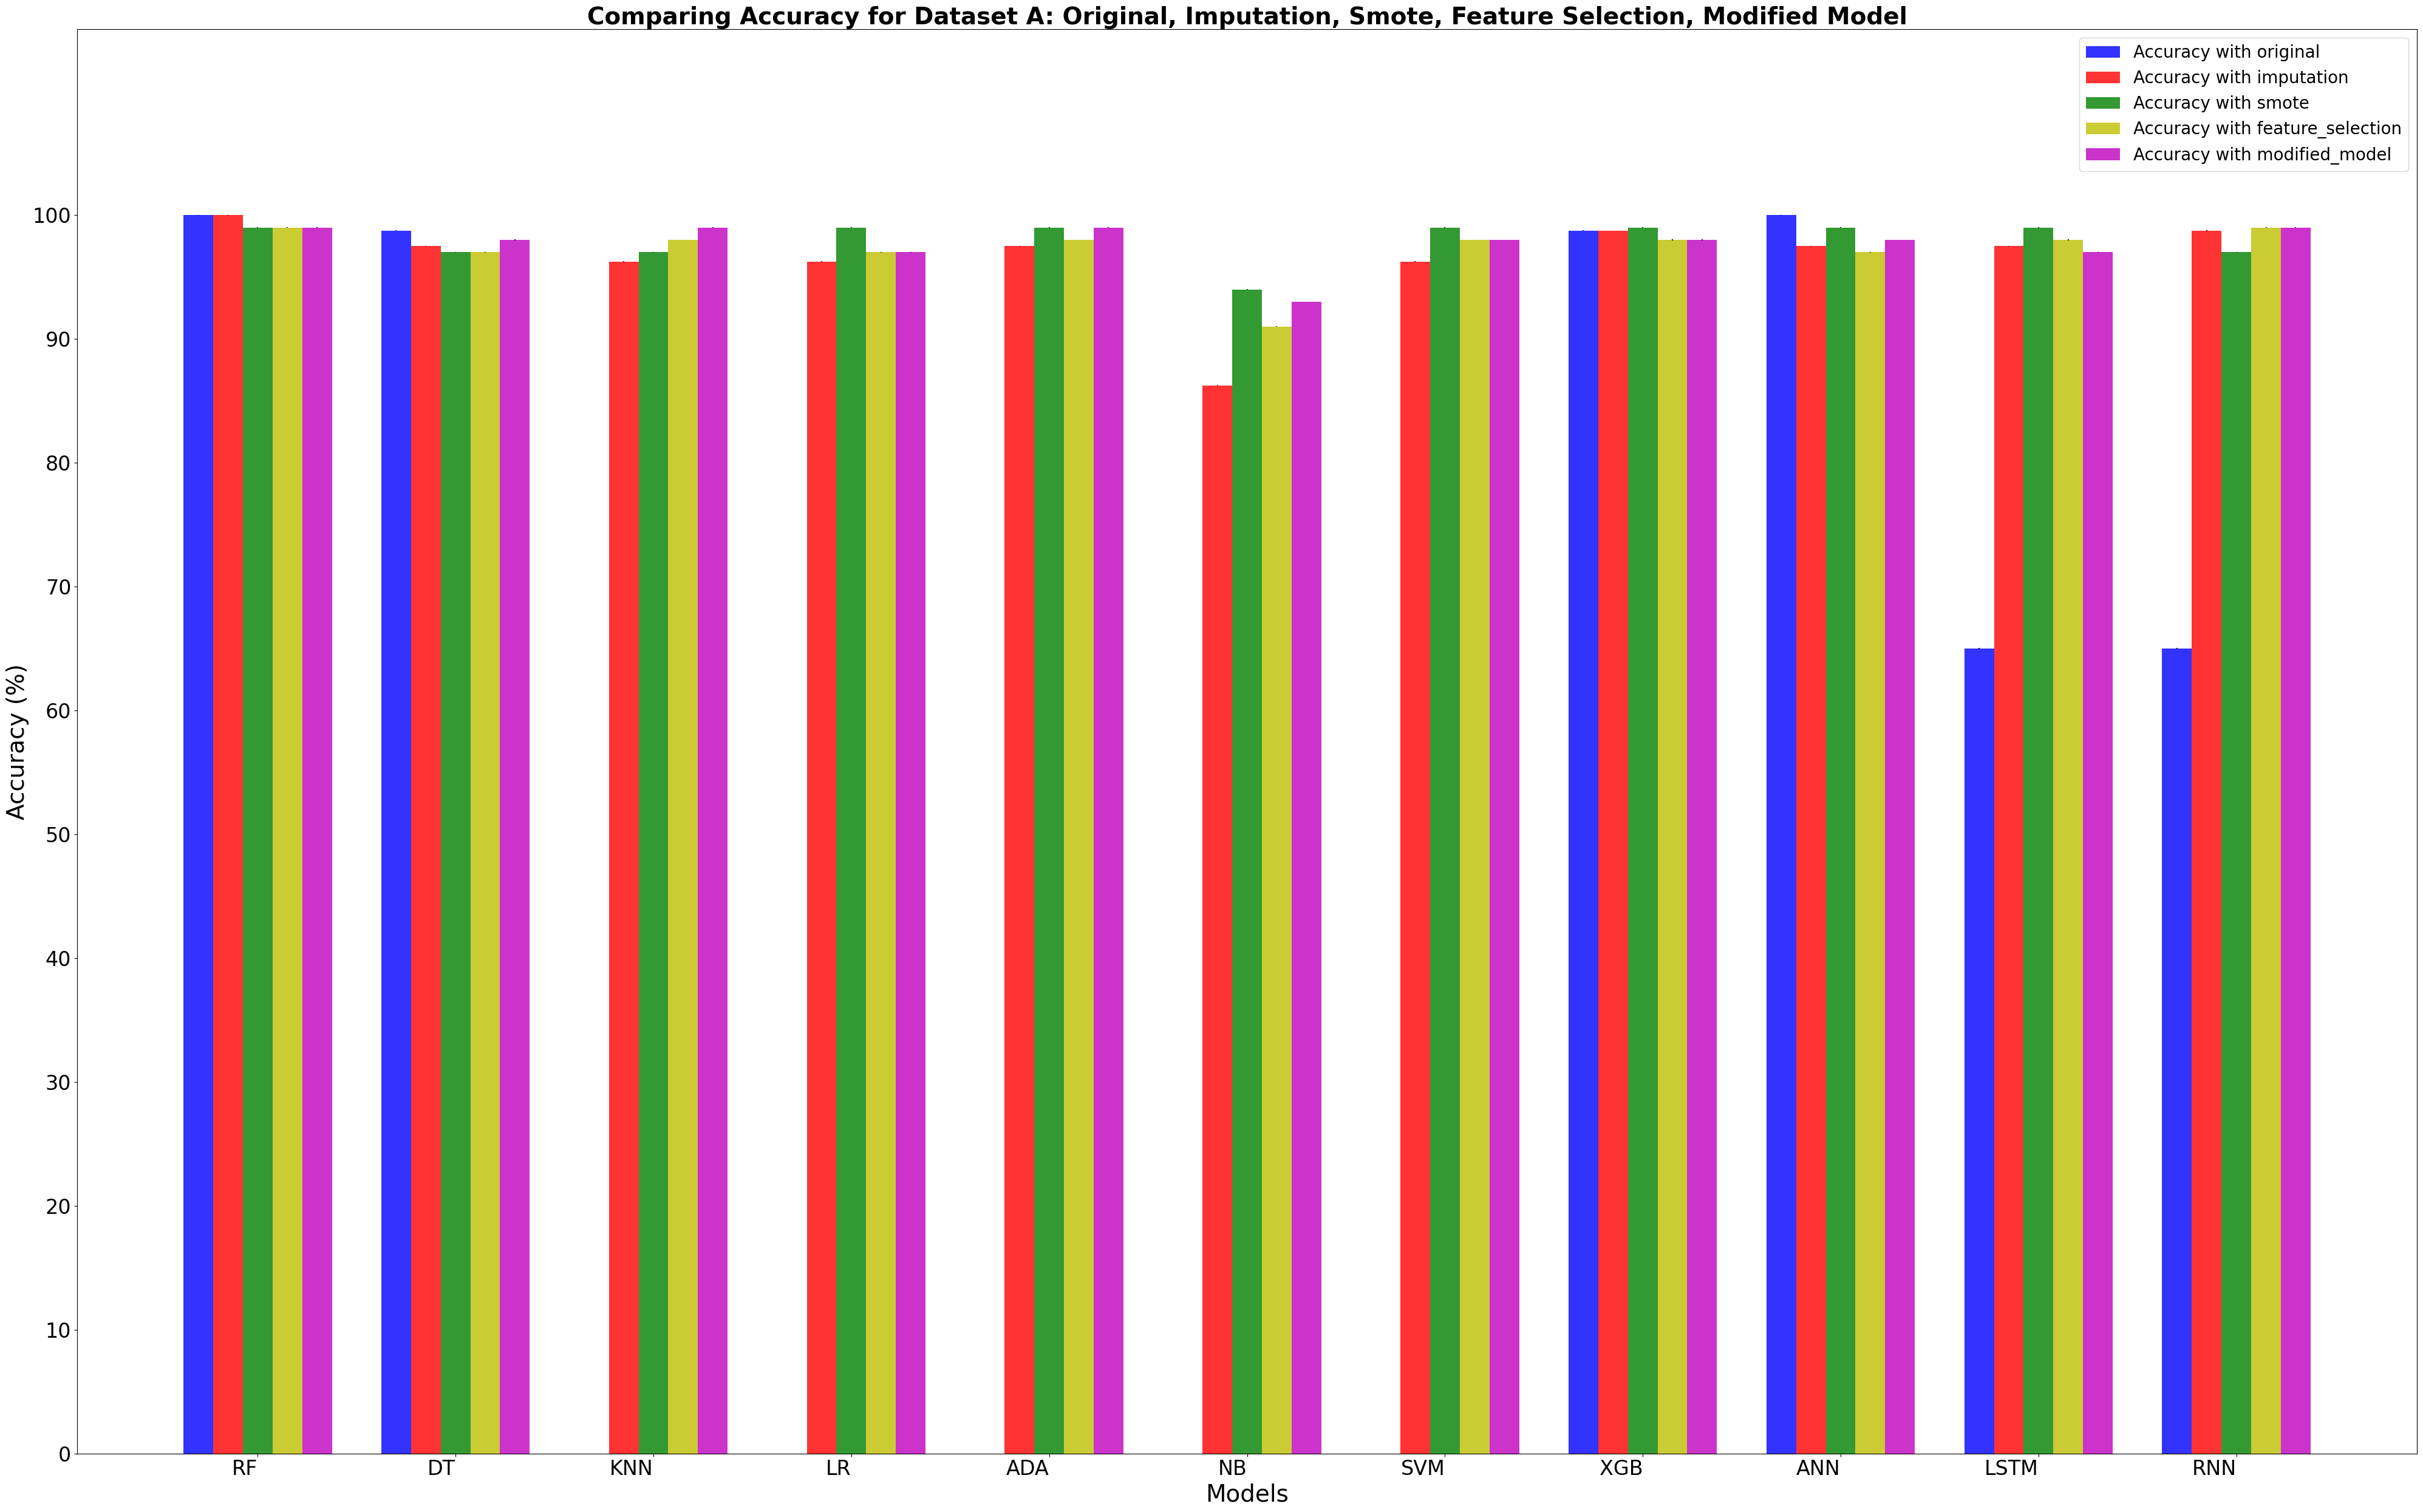

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models_structured = {
    'Accuracy with original': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'accuracy': [100, 98.75, 0, 0, 0, 0, 0, 98.75, 100, 65, 65],
        'errors': [0.02, 0.03, 0, 0, 0, 0, 0, 0.02, 0.02, 0.05, 0.05]
    },
    'Accuracy with imputation': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'accuracy': [100, 97.5, 96.25, 96.25, 97.5, 86.25, 96.25, 98.75, 97.5, 97.5, 98.75],
        'errors': [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]
    },
    'Accuracy with smote': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'accuracy': [99, 97, 97, 99, 99, 94, 99, 99, 99, 99, 97],
        'errors': [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.03]
    },
    'Accuracy with feature_selection': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'accuracy': [99, 97, 98, 97, 98, 91, 98, 98, 97, 98, 99],
        'errors': [0.02, 0.03, 0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.02]
    },
    'Accuracy with modified_model': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'accuracy': [99, 98, 99, 97, 99, 93, 98, 98, 98, 97, 99],
        'errors': [0.02, 0.03, 0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.02]
    }
}

# Plot settings
fig, ax = plt.subplots(figsize=(40, 25))
bar_width = 0.15
opacity = 0.8
error_config = {'ecolor': '0.1'}
x = range(len(models_structured['Accuracy with original']['names']))

# Function to plot data
def plot_data(category, shift, color):
    names = models_structured[category]['names']
    accuracies = models_structured[category]['accuracy']
    errors = models_structured[category]['errors']
    ax.bar([p + shift for p in x], accuracies, bar_width, alpha=opacity, color=color, label=category.capitalize(),
           yerr=errors, error_kw=error_config)

# Plotting all categories
plot_data('Accuracy with original', -0.3, 'b')
plot_data('Accuracy with imputation', -0.15, 'r')
plot_data('Accuracy with smote', 0, 'g')
plot_data('Accuracy with feature_selection', 0.15, 'y')
plot_data('Accuracy with modified_model', 0.3, 'm')

# Final plot adjustments
ax.set_title('Comparing Accuracy for Dataset A: Original, Imputation, Smote, Feature Selection, Modified Model', fontsize=28, weight='bold')
ax.set_xlabel('Models', fontsize=28)
ax.set_ylabel('Accuracy (%)', fontsize=28)
ax.set_xticks(x)
ax.set_xticklabels(models_structured['Accuracy with original']['names'], ha= 'right', fontsize=24)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=20, loc='upper right', bbox_to_anchor=(1, 1))
#ax.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Comparing Accuracy for Dataset A: Original, Imputation, Smote, Feature Selection, Modified Model.pdf')
plt.show()


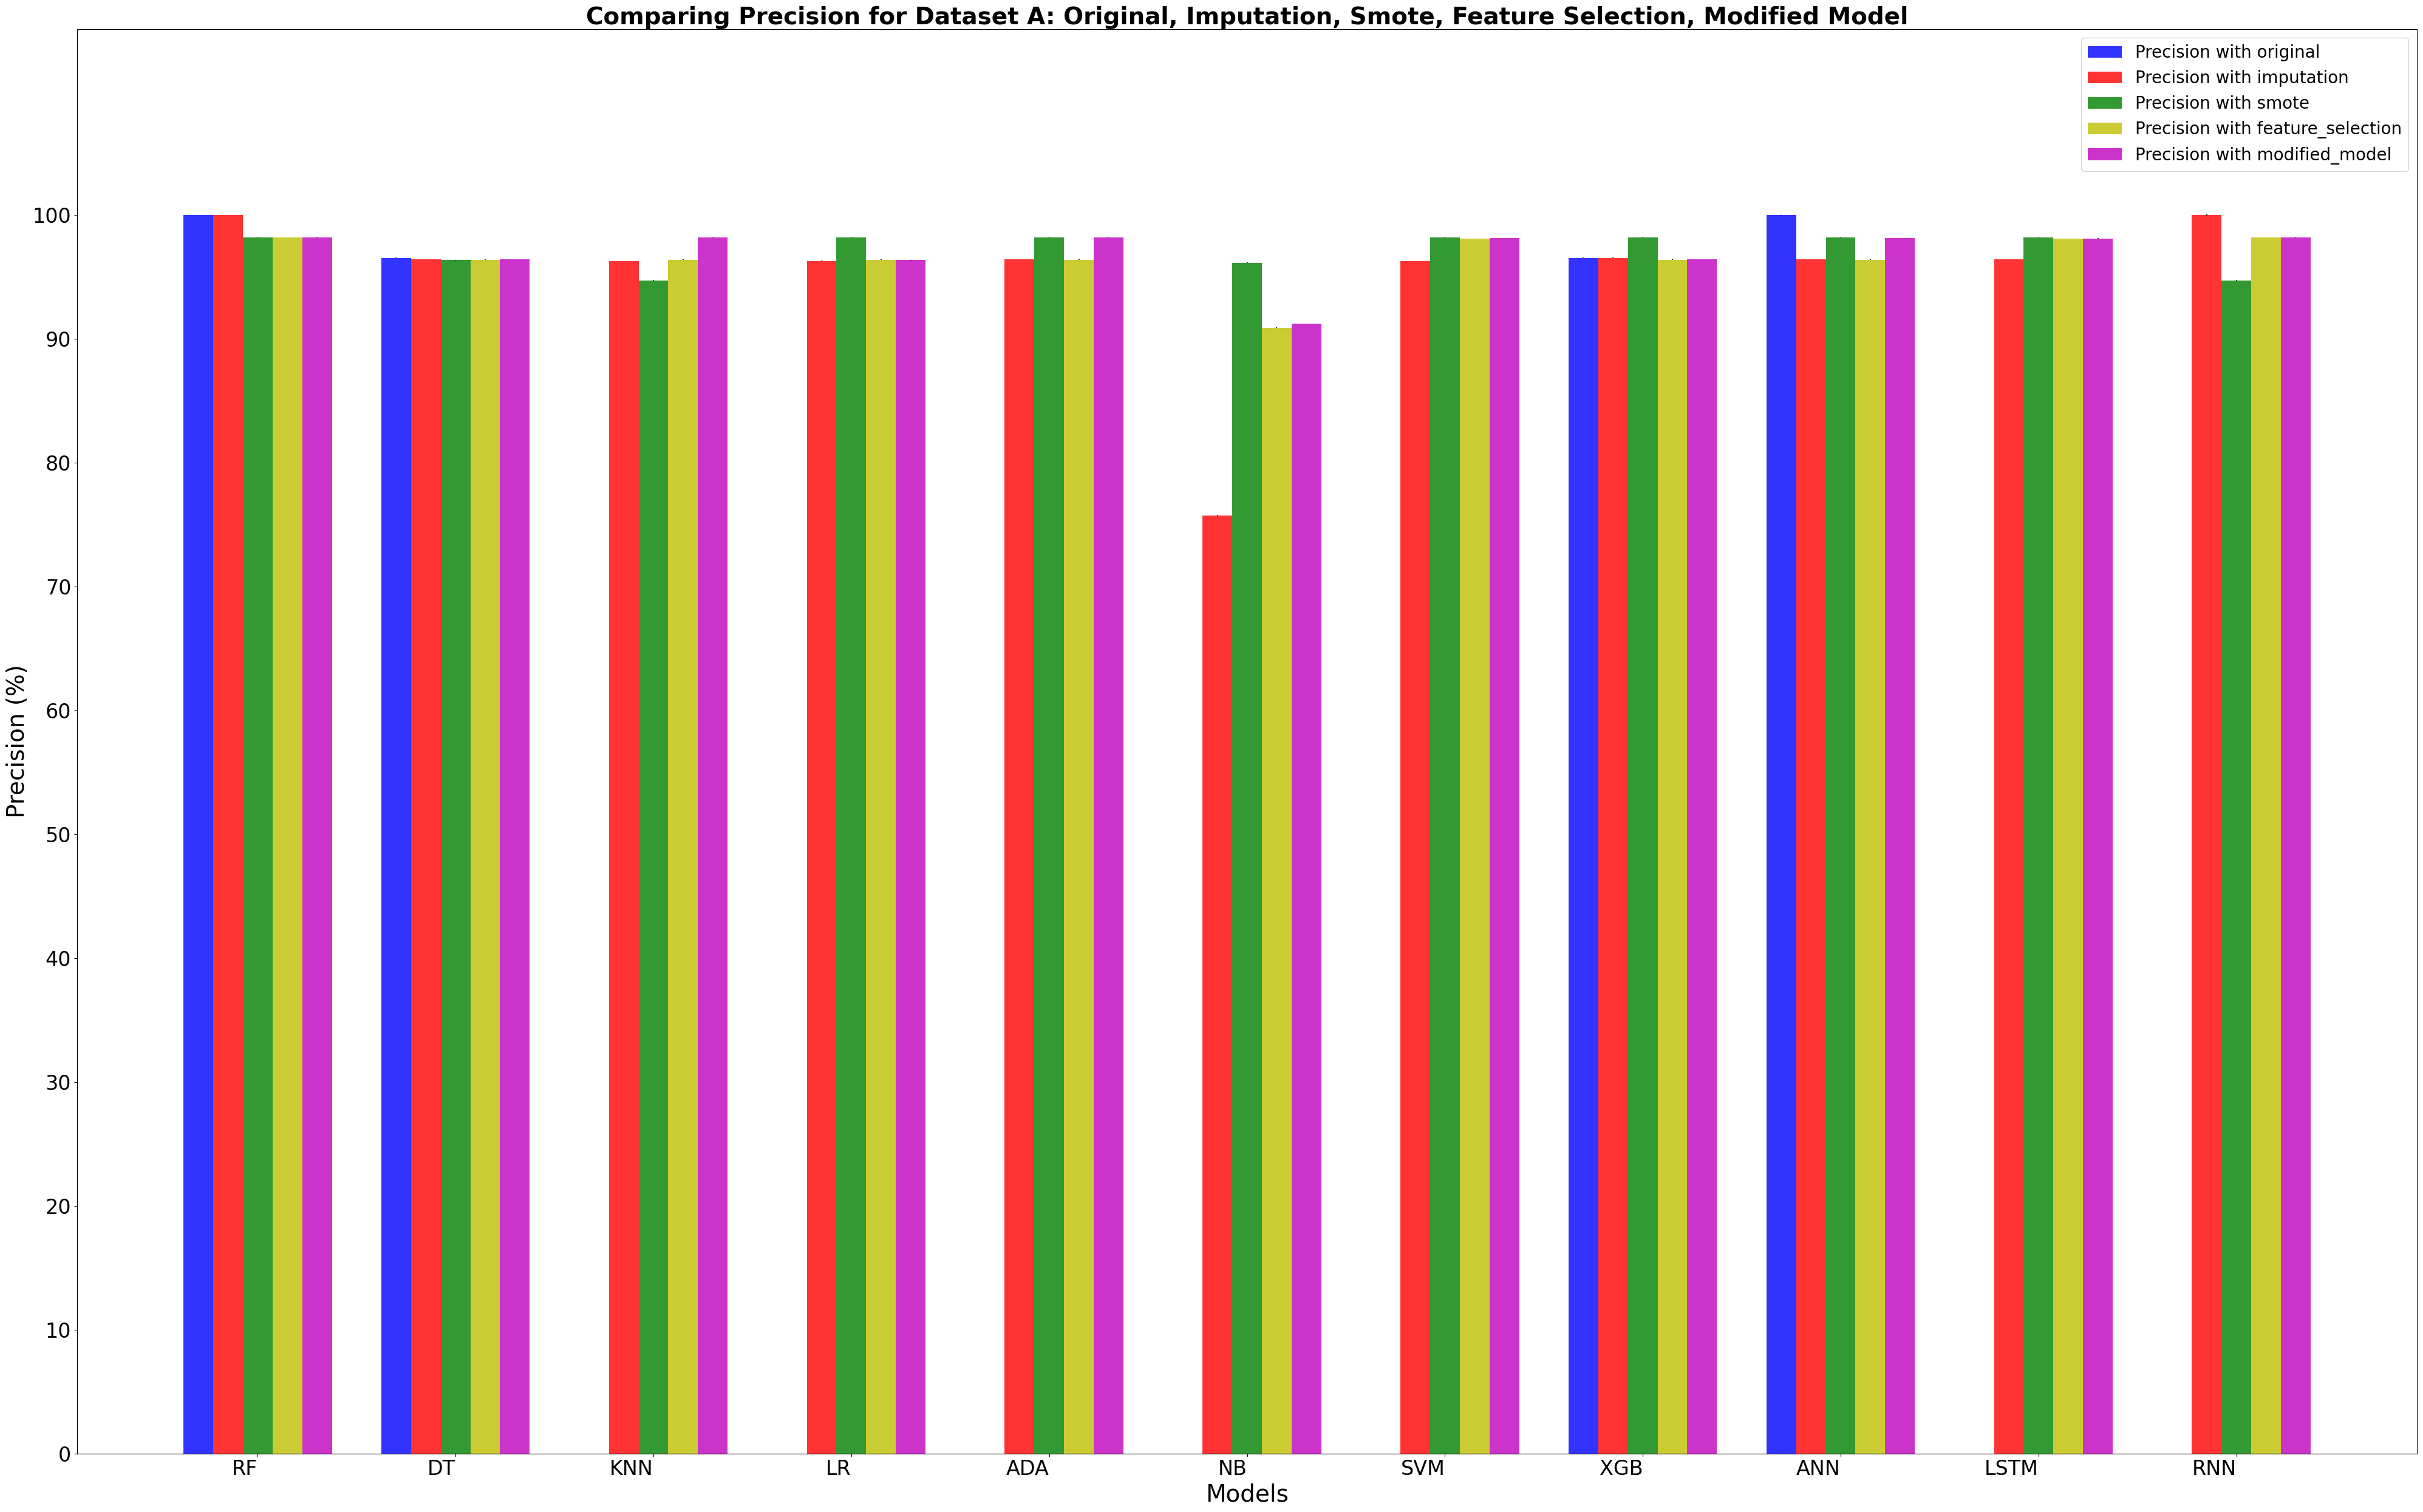

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models_structured = {
    'precision with original': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'precision': [100, 96.55, 0, 0, 0, 0, 0, 96.55, 100, 0, 0],
        'errors': [0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01]
    },
    'precision with imputation': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'precision': [100, 96.43, 96.30, 96.30, 96.43, 75.76, 96.30, 96.55, 96.43, 96.43, 100],
        'errors': [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02, 0.02, 0.05]
    },
    'precision with smote': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'precision': [98.18, 96.36, 94.74, 98.18, 98.18, 96.15, 98.18, 98.18, 98.18, 98.18, 94.74],
        'errors': [0.01, 0.02, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.02]
    },
    'precision with feature_selection': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'precision': [98.2, 96.4, 96.4, 96.4, 96.4, 90.9, 98.1, 96.4, 96.4, 98.1, 98.2],
        'errors': [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02, 0.02, 0.01]
    },
    'precision with modified_model': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'precision': [98.18, 96.43, 98.18, 96.36, 98.18, 91.23, 98.15, 96.43, 98.15, 98.11, 98.18],
        'errors': [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02, 0.02, 0.01]
    }
}

# Plot settings
fig, ax = plt.subplots(figsize=(40, 25))
bar_width = 0.15
opacity = 0.8
error_config = {'ecolor': '0.1'}
x = range(len(models_structured['precision with original']['names']))

# Function to plot data
def plot_data(category, shift, color):
    names = models_structured[category]['names']
    precision = models_structured[category]['precision']
    errors = models_structured[category]['errors']
    ax.bar([p + shift for p in x], precision, bar_width, alpha=opacity, color=color, label=category.capitalize(),
           yerr=errors, error_kw=error_config)

# Plotting all categories
plot_data('precision with original', -0.3, 'b')
plot_data('precision with imputation', -0.15, 'r')
plot_data('precision with smote', 0, 'g')
plot_data('precision with feature_selection', 0.15, 'y')
plot_data('precision with modified_model', 0.3, 'm')

# Final plot adjustments
ax.set_title('Comparing Precision for Dataset A: Original, Imputation, Smote, Feature Selection, Modified Model', fontsize=28, weight='bold')
ax.set_xlabel('Models', fontsize=28)
ax.set_ylabel('Precision (%)', fontsize=28)
ax.set_xticks(x)
ax.set_xticklabels(models_structured['precision with original']['names'], ha= 'right', fontsize=24)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)

ax.legend(fontsize=20, loc='upper right', bbox_to_anchor=(1, 1))
#ax.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Comparing Precision for Dataset A: Original, Imputation, Smote, Feature Selection, Modified Model.pdf')
plt.show()


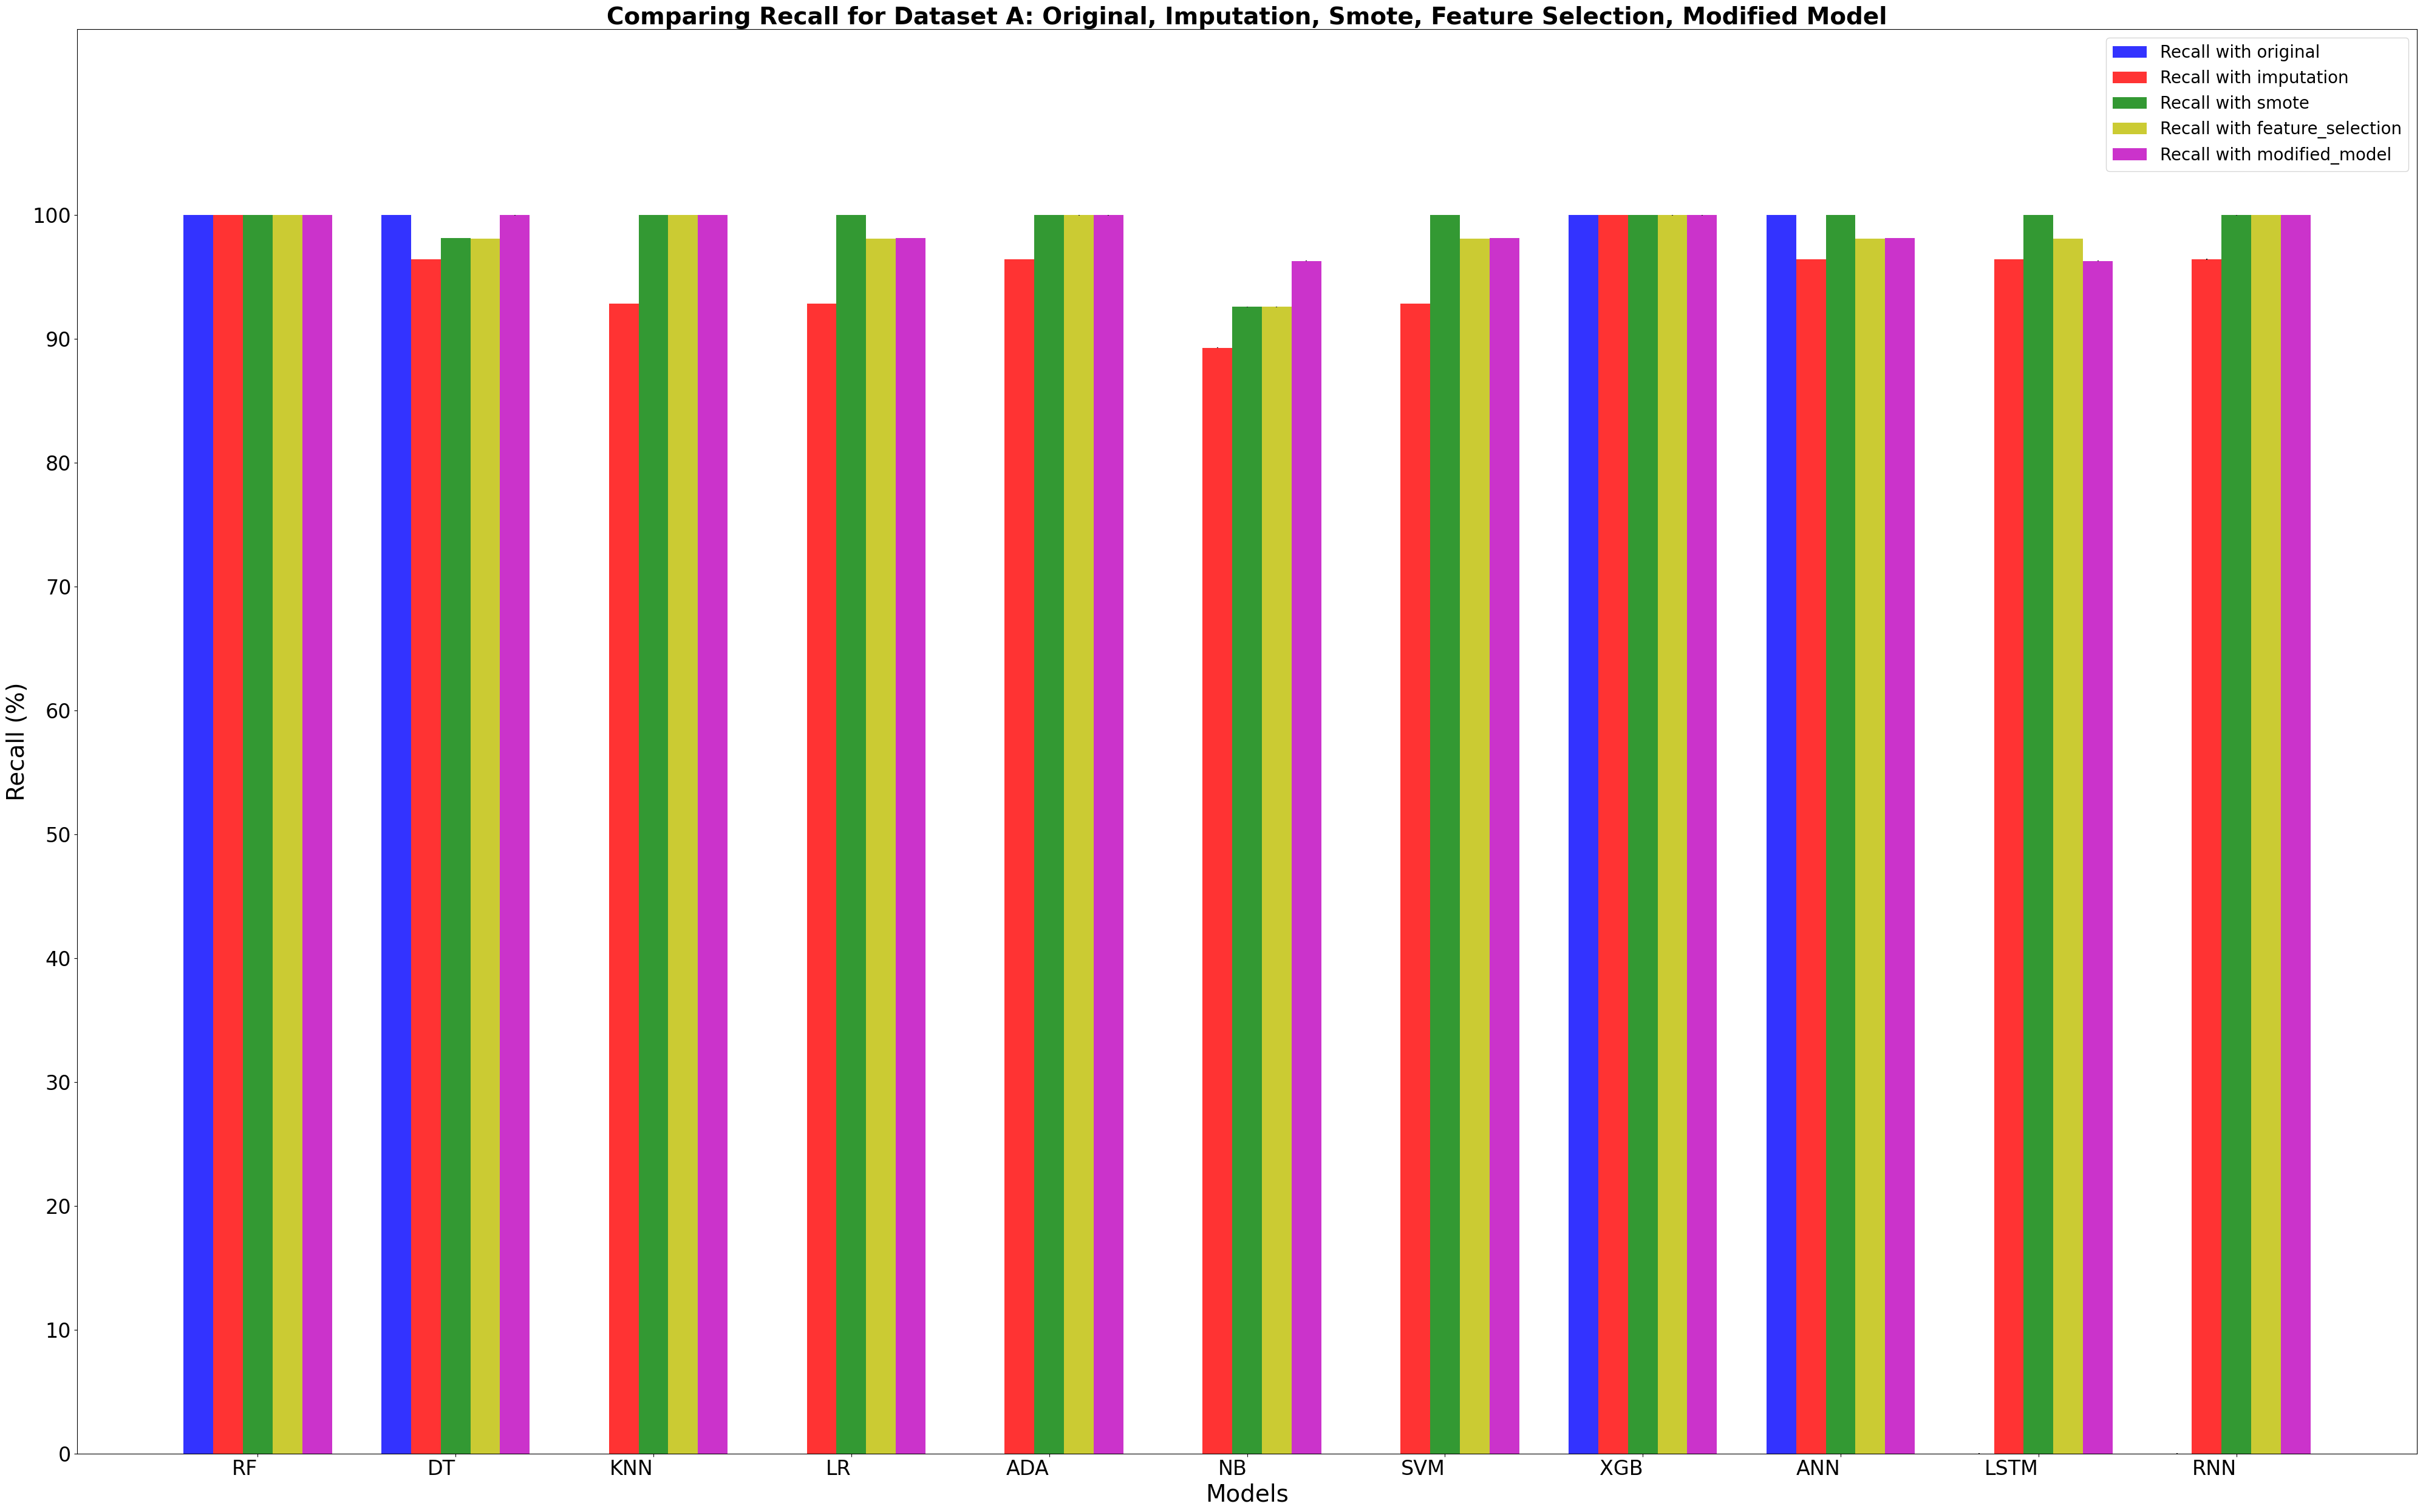

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models_structured = {
    'Recall with original': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'recall': [100 * x for x in [1.0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 0.0, 0.0]],
        'errors': [0.01, 0.01, 0, 0, 0, 0, 0, 0.01, 0.01, 0.05, 0.05]
    },

    'Recall with imputation': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'recall': [100 * x for x in [1.0, 0.9642857142857143, 0.9285714285714286, 0.9285714285714286, 0.9642857142857143, 0.8928571428571429, 0.9285714285714286, 1.0, 0.9642857142857143, 0.9642857142857143, 0.9642857142857143]],
        'errors': [0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.05]
    },

    'Recall with smote': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'recall': [100.0, 98.14814814814815, 100.0, 100.0, 100.0, 92.5925925925926, 100.0, 100.0, 100.0, 100.0, 100.0],
        'errors': [0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.02]
    },
    'Recall with feature_selection': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'recall': [100.0, 98.1, 100.0, 98.1, 100.0, 92.6, 98.1, 100.0, 98.1, 98.1, 100.0],
        'errors': [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01]
    },

    'Recall with modified_model': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'recall': [100 * x for x in [1.0, 1.0, 1.0, 0.9814814814814815, 1.0, 0.9629629629629629, 0.9814814814814815, 1.0,  0.9814814814814815, 0.9629629629629629, 1.0]],
        'errors': [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01]
    }
}

# Plot settings
fig, ax = plt.subplots(figsize=(40, 25))
bar_width = 0.15
opacity = 0.8
error_config = {'ecolor': '0.1'}
x = range(len(models_structured['Recall with original']['names']))

# Function to plot data
def plot_data(category, shift, color):
    names = models_structured[category]['names']
    recalls = models_structured[category]['recall']
    errors = models_structured[category]['errors']
    ax.bar([p + shift for p in x], recalls, bar_width, alpha=opacity, color=color, label=category.capitalize(),
           yerr=errors, error_kw=error_config)

# Plotting all categories
plot_data('Recall with original', -0.3, 'b')
plot_data('Recall with imputation', -0.15, 'r')
plot_data('Recall with smote', 0, 'g')
plot_data('Recall with feature_selection', 0.15, 'y')
plot_data('Recall with modified_model', 0.3, 'm')

# Final plot adjustments
ax.set_title('Comparing Recall for Dataset A: Original, Imputation, Smote, Feature Selection, Modified Model', fontsize=28, weight='bold')
ax.set_xlabel('Models', fontsize=28)
ax.set_ylabel('Recall (%)', fontsize=28)
ax.set_xticks(x)
ax.set_xticklabels(models_structured['Recall with original']['names'], ha= 'right', fontsize=24)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=20, loc='upper right', bbox_to_anchor=(1, 1))
#ax.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Comparing Recall for Dataset A: Original, Imputation, Smote, Feature Selection, Modified Model.pdf')
plt.show()


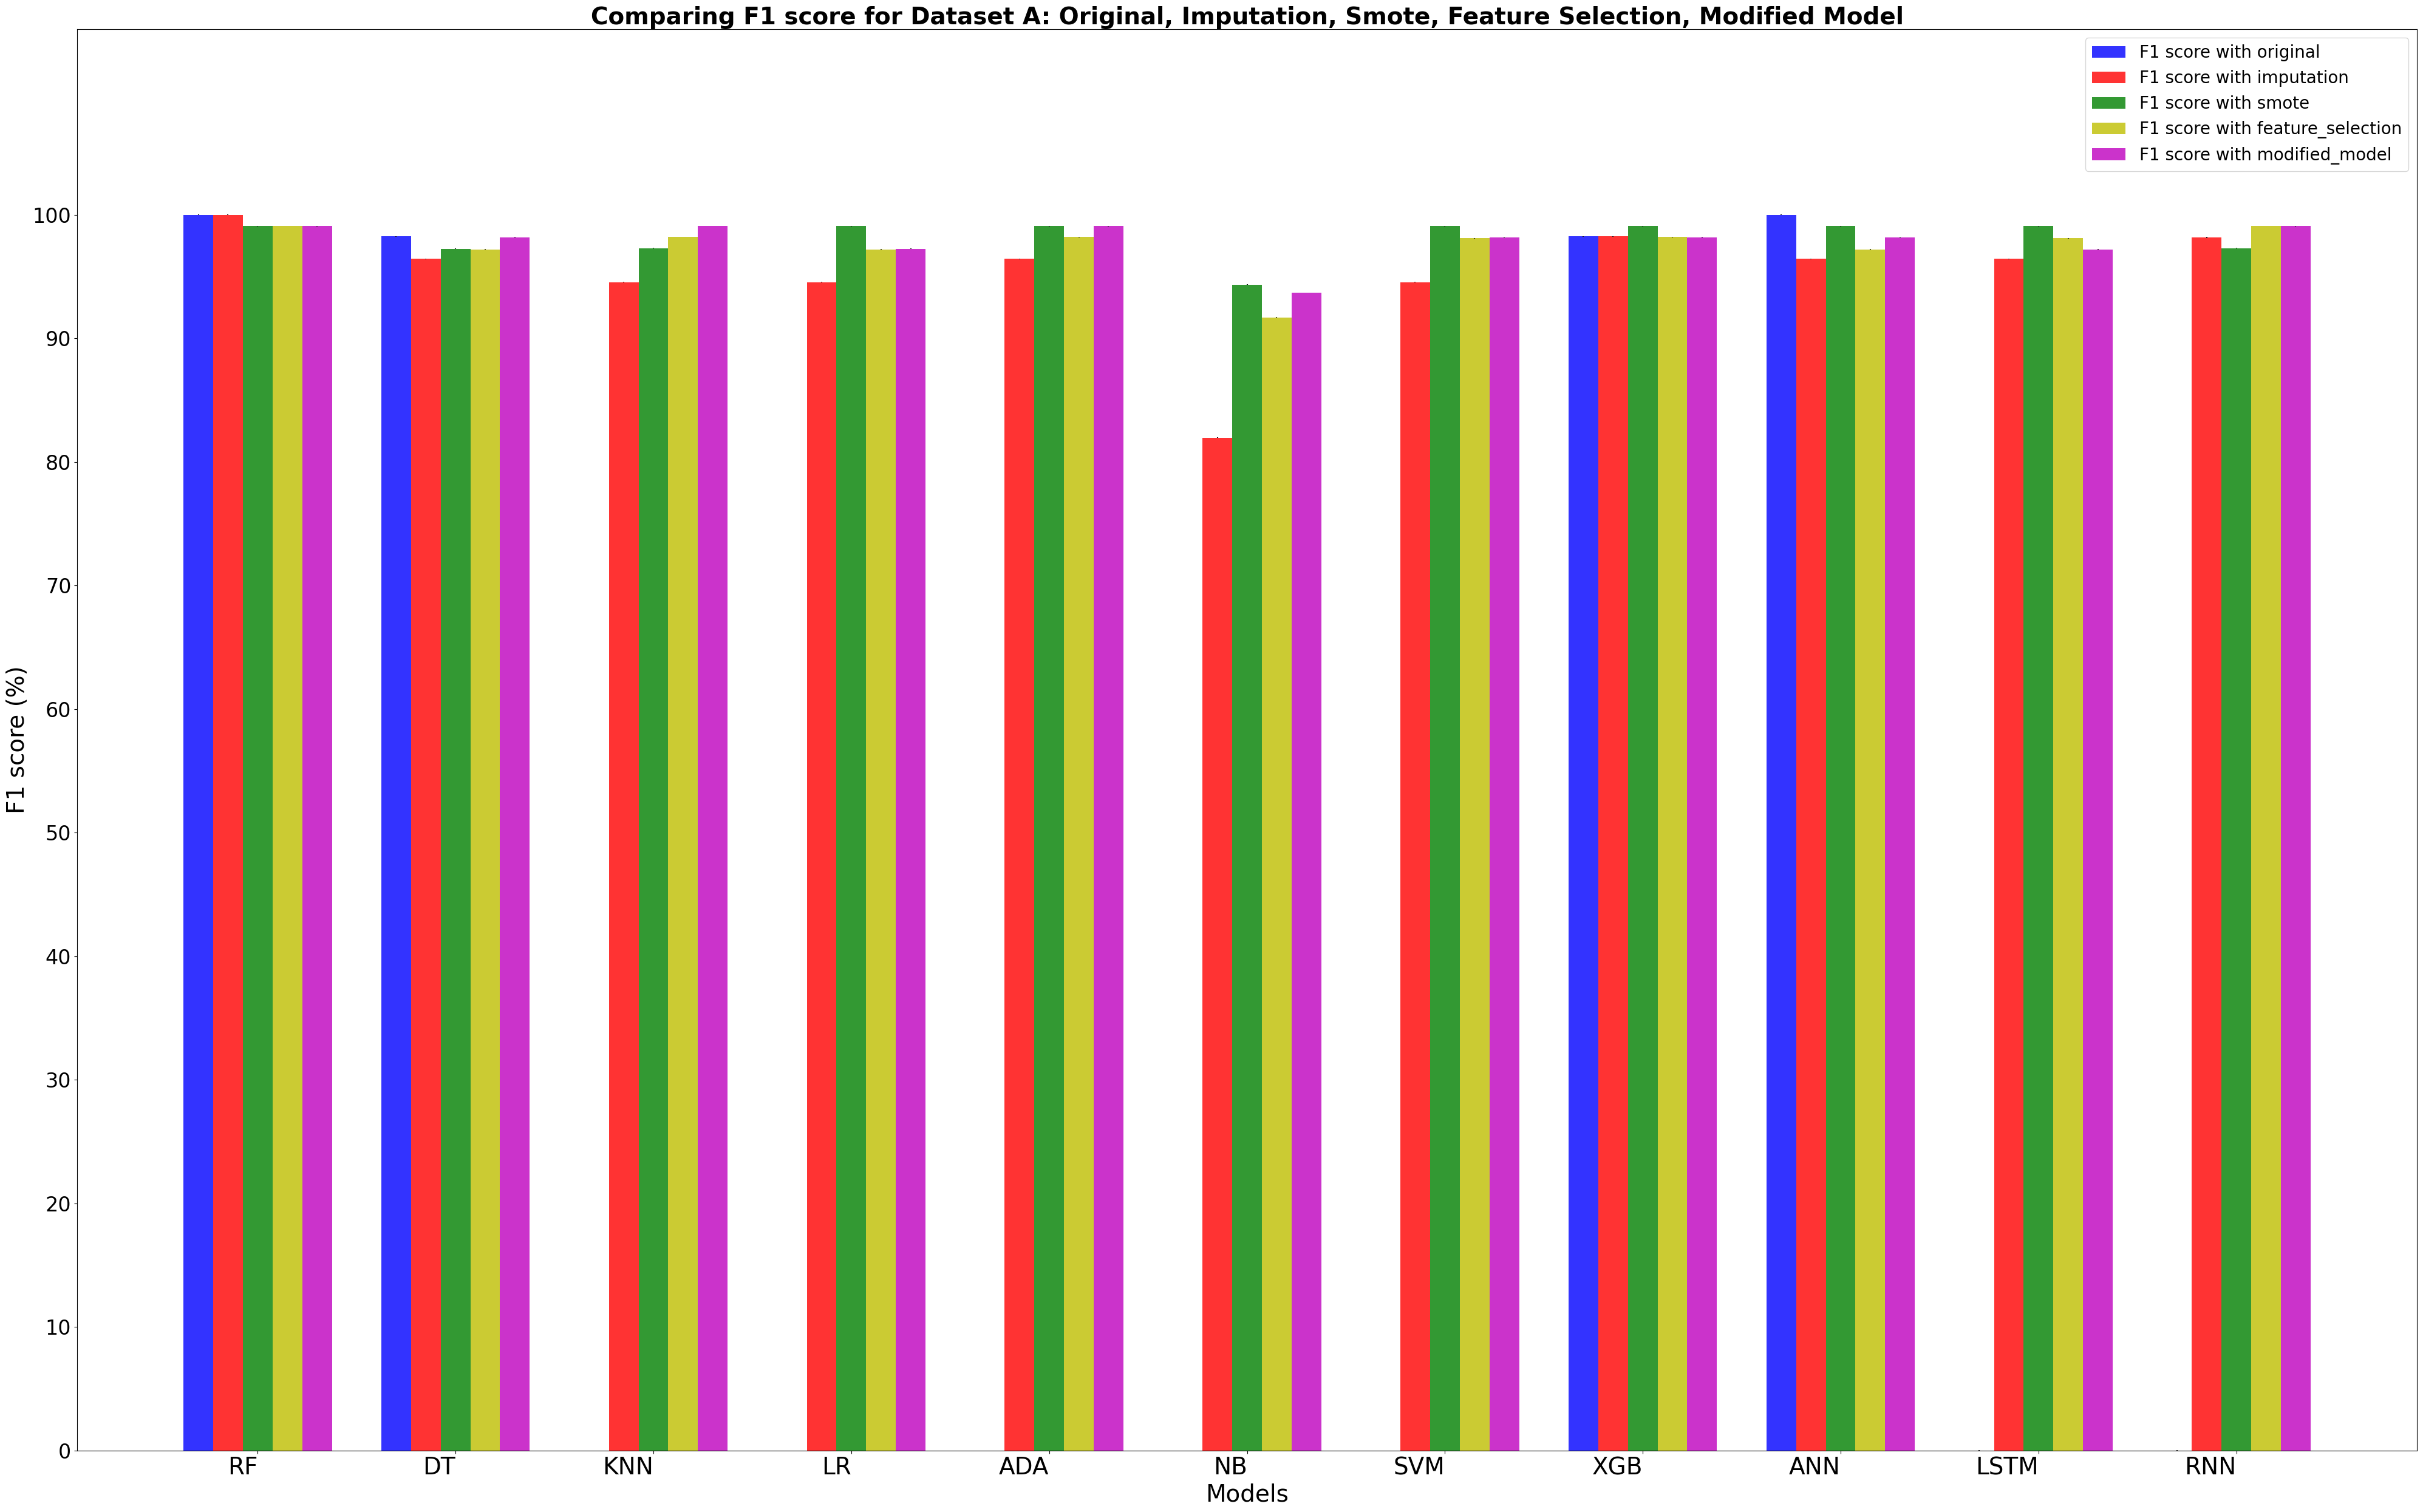

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models_structured = {
    'F1 score with original': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'f1': [100 * x for x in [1.0, 0.9825, 0, 0, 0, 0, 0, 0.9825, 1.0, 0.0, 0.0]],
        'errors': [0.02, 0.03, 0, 0, 0, 0, 0, 0.02, 0.02, 0.05, 0.05]
    },

    'F1 score with imputation': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'f1': [100 * x for x in [1.0, 0.9642857142857143, 0.9454545454545454, 0.9454545454545454, 0.9642857142857143, 0.819672131147541, 0.9454545454545454, 0.9824561403508771, 0.9642857142857143, 0.9642857142857143, 0.9818181818181818]],
        'errors': [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]
    },

    'F1 score with smote': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'f1': [99.08256880733946, 97.24770642201835, 97.29729729729729, 99.08256880733946, 99.08256880733946, 94.33962264150944, 99.08256880733946, 99.08256880733946, 99.08256880733946, 99.08256880733946, 97.29729729729729],
        'errors': [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.03]
    },
    'F1 score with feature_selection': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'f1': [99.1, 97.2, 98.2, 97.2, 98.2, 91.7, 98.1, 98.2, 97.2, 98.1, 99.1],
        'errors': [0.02, 0.03, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.02]
    },

    'F1 score with modified_model': {
        'names': ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN'],
        'f1': [100 * x for x in [0.9908256880733946, 0.9818181818181818, 0.9908256880733946,  0.9724770642201835, 0.9908256880733946,  0.9369369369369369, 0.9814814814814815, 0.9818181818181818, 0.9814814814814815, 0.9719626168224299, 0.9908256880733944]],
        'errors': [0.02, 0.03, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.03, 0.02]
    }
}

# Plot settings
fig, ax = plt.subplots(figsize=(40, 25))
bar_width = 0.15
opacity = 0.8
error_config = {'ecolor': '0.1'}
x = range(len(models_structured['F1 score with original']['names']))

# Function to plot data
def plot_data(category, shift, color):
    names = models_structured[category]['names']
    f1 = models_structured[category]['f1']
    errors = models_structured[category]['errors']
    ax.bar([p + shift for p in x], f1, bar_width, alpha=opacity, color=color, label=category.capitalize(),
           yerr=errors, error_kw=error_config)

# Plotting all categories
plot_data('F1 score with original', -0.3, 'b')
plot_data('F1 score with imputation', -0.15, 'r')
plot_data('F1 score with smote', 0, 'g')
plot_data('F1 score with feature_selection', 0.15, 'y')
plot_data('F1 score with modified_model', 0.3, 'm')

# Final plot adjustments
ax.set_title('Comparing F1 score for Dataset A: Original, Imputation, Smote, Feature Selection, Modified Model', fontsize=28, weight='bold')
ax.set_xlabel('Models', fontsize=28)
ax.set_ylabel('F1 score (%)', fontsize=28)
ax.set_xticks(x)
ax.set_xticklabels(models_structured['F1 score with original']['names'], ha= 'right', fontsize=28)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=20, loc='upper right', bbox_to_anchor=(1, 1))
#ax.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Comparing F1 score for Dataset A: Original, Imputation, Smote, Feature Selection, Modified Model.pdf')
plt.show()
